In [1]:
# 1.1 A) Core data & ML
%pip install --quiet pandas numpy scipy scikit-learn statsmodels matplotlib seaborn plotly

# 1B) Time series & optimization
%pip install --quiet pmdarima prophet cmdstanpy scikit-optimize[plots]

# 1C) Geospatial stack
%pip install --quiet geopandas shapely pyproj contextily

# 1D) Explainability & experiment tracking
%pip install --quiet shap mlflow

# 1E) Optional gradient boosting tree
%pip install --quiet xgboost



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
zsh:1: no matches found: scikit-optimize[plots]
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
# 1.2) Sanity Check
# Confirms everything is importable and prints versions.

In [2]:
import sys, numpy, pandas, sklearn, statsmodels, plotly, shap, mlflow, geopandas
print("Python:", sys.version)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("scikit-learn:", sklearn.__version__)
print("statsmodels:", statsmodels.__version__)
print("plotly:", plotly.__version__)
print("geopandas:", geopandas.__version__)
print("shap:", shap.__version__)
print("mlflow:", mlflow.__version__)
print("✅ OK: imports loaded")


Python: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:14:12) [Clang 14.0.6 ]
numpy: 1.26.4
pandas: 2.2.2
scikit-learn: 1.4.2
statsmodels: 0.14.2
plotly: 5.22.0
geopandas: 1.1.1
shap: 0.49.1
mlflow: 3.4.0
✅ OK: imports loaded


In [ ]:
# 1.3) Project Folder

In [3]:
import os, pathlib

root = pathlib.Path.cwd() / "bda600-capstone"
subdirs = [
    "data/raw", "data/interim", "data/processed",
    "notebooks",
    "src",
    "models",
    "reports",
    "mlruns"
]
for s in subdirs:
    (root / s).mkdir(parents=True, exist_ok=True)

root


PosixPath('/Users/yenkopro/bda600-capstone')

In [5]:
# 1.4 Starter notebooks

In [4]:
from pathlib import Path

nb_dir = root / "notebooks"
nb_names = [
    "01_eda.ipynb",
    "02_preprocess.ipynb",
    "03_forecasting.ipynb",
    "04_classification_pipeline.ipynb",
    "05_hparam_search.ipynb",
    "06_dashboard_exports.ipynb",
]
# Create minimal, valid .ipynb structure
minimal_nb = {
 "cells": [],
 "metadata": {"language_info": {"name": "python"}},
 "nbformat": 4,
 "nbformat_minor": 5
}
import json
for nb in nb_names:
    p = nb_dir / nb
    if not p.exists():
        p.write_text(json.dumps(minimal_nb, indent=2), encoding="utf-8")

sorted([p.name for p in nb_dir.iterdir()])


['01_eda.ipynb',
 '02_preprocess.ipynb',
 '03_forecasting.ipynb',
 '04_classification_pipeline.ipynb',
 '05_hparam_search.ipynb',
 '06_dashboard_exports.ipynb']

In [ ]:
# 1.5 Save environment

In [6]:
import subprocess, pathlib, sys

req_path = root / "requirements.txt"
out = subprocess.run([sys.executable, "-m", "pip", "freeze"], capture_output=True, text=True)
req_path.write_text(out.stdout)
req_path, len(out.stdout.splitlines())


(PosixPath('/Users/yenkopro/bda600-capstone/requirements.txt'), 447)

In [8]:
#1.6 MLflow
# Run Logs, params, metrics, and artifacts

In [9]:
import mlflow, os

mlflow.set_tracking_uri("file://" + str((root / "mlruns").resolve()))
mlflow.set_experiment("bda600_sfpd_temporal")
print("✅ MLflow experiment set at:", (root / "mlruns").resolve())


2025/10/30 13:18:45 INFO mlflow.tracking.fluent: Experiment with name 'bda600_sfpd_temporal' does not exist. Creating a new experiment.


✅ MLflow experiment set at: /Users/yenkopro/bda600-capstone/mlruns


In [10]:
#1.7 Global random seed helper

In [11]:
import numpy as np
def set_seed(seed: int = 42):
    import random
    random.seed(seed)
    np.random.seed(seed)
    try:
        import torch
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    except Exception:
        pass
    return seed

set_seed(42)
print("✅ Seed set")


✅ Seed set


In [12]:
# Change of PATH

In [13]:
import pathlib

# 👇 Your custom project path
root = pathlib.Path("/Users/yenkopro/Desktop/bda600-capstone")
root.mkdir(parents=True, exist_ok=True)

# Create standard subfolders
subdirs = [
    "data/raw", "data/interim", "data/processed",
    "notebooks",
    "src",
    "models",
    "reports",
    "mlruns"
]
for s in subdirs:
    (root / s).mkdir(parents=True, exist_ok=True)

print("✅ Project root set to:", root.resolve())


✅ Project root set to: /Users/yenkopro/Desktop/bda600-capstone


In [ ]:
#2.1 DATASET

In [14]:
import pandas as pd
from pathlib import Path

raw_path = Path("/Users/yenkopro/Desktop/bda600-capstone/data/raw/sfpd_incidents.csv")

# Load (parse dates later)
df = pd.read_csv(raw_path, low_memory=False)
print("✅ Loaded:", df.shape, "rows × columns")
df.head()


✅ Loaded: (976620, 29) rows × columns


,Row ID,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Incident ID,Incident Number,CAD Number,...,CNN,Police District,Analysis Neighborhood,Supervisor District,Supervisor District 2012,Latitude,Longitude,Point,data_as_of,data_loaded_at
0,148998204134,2025/06/13 12:41:00 PM,2025/06/13,12:41,2025,Friday,2025/06/13 12:46:00 PM,1489982,250329888,251641497.0,...,20872000.0,Ingleside,McLaren Park,9.0,9.0,37.718128,-122.414177,POINT (-122.414176941 37.718128204),2025/06/14 09:37:39 AM,2025/06/15 09:53:25 AM
1,149078406244,2025/06/15 01:45:00 AM,2025/06/15,01:45,2025,Sunday,2025/06/15 11:25:00 AM,1490784,256058926,NaN,...,NaN,Southern,NaN,NaN,NaN,NaN,NaN,NaN,2025/06/18 09:38:27 AM,2025/06/19 09:52:54 AM
2,149078609320,2025/06/05 01:45:00 AM,2025/06/05,01:45,2025,Thursday,2025/06/05 12:51:00 PM,1490786,256058603,NaN,...,NaN,Southern,NaN,NaN,NaN,NaN,NaN,NaN,2025/06/18 09:38:27 AM,2025/06/19 09:52:54 AM
3,148973468020,2025/06/12 09:30:00 AM,2025/06/12,09:30,2025,Thursday,2025/06/12 09:30:00 AM,1489734,250327296,251630917.0,...,32862000.0,Mission,Golden Gate Park,7.0,5.0,37.768177,-122.455284,POINT (-122.455284119 37.768177032),2025/06/17 09:37:16 AM,2025/06/18 09:52:48 AM
4,149052763010,2025/06/16 11:42:00 AM,2025/06/16,11:42,2025,Monday,2025/06/16 11:42:00 AM,1490527,240573249,251671270.0,...,20151000.0,Bayview,Bayview Hunters Point,10.0,10.0,37.727043,-122.388672,POINT (-122.388671875 37.727043152),2025/06/17 09:37:16 AM,2025/06/18 09:52:48 AM


In [15]:
#2.2 METADATA

In [16]:
# General info
df.info(memory_usage="deep")

# First & last dates (if available)
if "Incident Date" in df.columns:
    print("Date range:", df["Incident Date"].min(), "→", df["Incident Date"].max())

# Unique counts for key fields
cols_check = ["Incident Category", "Incident Subcategory", "Police District", "Neighborhood"]
for c in cols_check:
    if c in df.columns:
        print(f"{c}: {df[c].nunique()} unique values")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976620 entries, 0 to 976619
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Row ID                    976620 non-null  int64  
 1   Incident Datetime         976620 non-null  object 
 2   Incident Date             976620 non-null  object 
 3   Incident Time             976620 non-null  object 
 4   Incident Year             976620 non-null  int64  
 5   Incident Day of Week      976620 non-null  object 
 6   Report Datetime           976620 non-null  object 
 7   Incident ID               976620 non-null  int64  
 8   Incident Number           976620 non-null  int64  
 9   CAD Number                756953 non-null  float64
 10  Report Type Code          976620 non-null  object 
 11  Report Type Description   976620 non-null  object 
 12  Filed Online              192734 non-null  object 
 13  Incident Code             976620 non-null  i

In [ ]:
# Missing Values

In [17]:
na_summary = (
    df.isna()
    .mean()
    .sort_values(ascending=False)
    .to_frame("missing_fraction")
    .style.format("{:.1%}")
)
na_summary


,missing_fraction
Filed Online,80.3%
CAD Number,22.5%
Supervisor District,5.6%
Analysis Neighborhood,5.6%
Supervisor District 2012,5.6%
Point,5.5%
Longitude,5.5%
Latitude,5.5%
CNN,5.5%
Intersection,5.5%


In [ ]:
#2.4 Simple Metadata Report

In [18]:
report_path = Path("/Users/yenkopro/Desktop/bda600-capstone/reports/metadata_report.txt")

with open(report_path, "w") as f:
    f.write("SFPD Dataset Metadata Summary\n")
    f.write("="*40 + "\n\n")
    df.info(buf=f)
    f.write("\n\nColumn Samples:\n")
    f.write(df.head().to_string())
    f.write("\n\nMissing Value Fractions:\n")
    f.write(df.isna().mean().to_string())

print("Metadata report saved at:", report_path)


Metadata report saved at: /Users/yenkopro/Desktop/bda600-capstone/reports/metadata_report.txt


In [19]:
#2.5 Column Names Preview

In [20]:
df.columns.tolist()


['Row ID',
 'Incident Datetime',
 'Incident Date',
 'Incident Time',
 'Incident Year',
 'Incident Day of Week',
 'Report Datetime',
 'Incident ID',
 'Incident Number',
 'CAD Number',
 'Report Type Code',
 'Report Type Description',
 'Filed Online',
 'Incident Code',
 'Incident Category',
 'Incident Subcategory',
 'Incident Description',
 'Resolution',
 'Intersection',
 'CNN',
 'Police District',
 'Analysis Neighborhood',
 'Supervisor District',
 'Supervisor District 2012',
 'Latitude',
 'Longitude',
 'Point',
 'data_as_of',
 'data_loaded_at']

In [ ]:
#3.1 Standarized Schema & Parse datetimes 2020-2024 (5yrs)

In [ ]:
# Exploratory Data Analysis 

In [21]:
import pandas as pd
import numpy as np

# Makes a copy
df0 = df.copy()

# Normalize column names (strip/standardize case)
df0.columns = df0.columns.str.strip()

# Identify date/time columns with fallbacks
date_col_candidates = ["Incident Date", "Incident_Date", "IncidentDate", "Report Datetime", "Report Date"]
time_col_candidates = ["Incident Time", "Incident_Time", "IncidentTime", "Report Time"]

def first_existing(cols):
    return next((c for c in cols if c in df0.columns), None)

DATE_COL = first_existing(date_col_candidates)
TIME_COL = first_existing(time_col_candidates)

print("Using DATE_COL:", DATE_COL)
print("Using TIME_COL:", TIME_COL)

# Parse datetime safely
if DATE_COL is None:
    raise ValueError("Could not find a date column. Check your CSV headers.")

df0["__date"] = pd.to_datetime(df0[DATE_COL], errors="coerce")

if TIME_COL and TIME_COL in df0.columns:
    # Attempt to parse HH:MM or HH:MM:SS
    # If already datetime-like, coerce to hour later
    # Many SFPD exports store time as string "HH:MM"
    try:
        df0["__hour"] = pd.to_datetime(df0[TIME_COL], format="%H:%M", errors="coerce").dt.hour
    except Exception:
        # fallback: try seconds
        df0["__hour"] = pd.to_datetime(df0[TIME_COL], format="%H:%M:%S", errors="coerce").dt.hour
else:
    df0["__hour"] = np.nan

# Drop rows with no valid date
df0 = df0[df0["__date"].notna()].copy()

# Date parts
df0["year"] = df0["__date"].dt.year
df0["month"] = df0["__date"].dt.month
df0["dayofweek"] = df0["__date"].dt.dayofweek  # 0=Mon
df0["date_only"] = df0["__date"].dt.date

# Key categoricals (adjust if your file uses other names)
cat_cols_possible = {
    "Incident Category": ["Incident Category", "Incident_Category", "IncidentCategory"],
    "Incident Subcategory": ["Incident Subcategory","Incident_Subcategory","IncidentSubcategory"],
    "Police District": ["Police District","Police_District","PoliceDistrict"],
    "Neighborhood": ["Neighborhood","Analysis Neighborhood","Analysis_Neighborhood","AnalysisNeighborhood"]
}

def pick_col(options):
    return next((c for c in options if c in df0.columns), None)

COL_CATEGORY = pick_col(cat_cols_possible["Incident Category"])
COL_SUBCAT  = pick_col(cat_cols_possible["Incident Subcategory"])
COL_DIST    = pick_col(cat_cols_possible["Police District"])
COL_NHOOD   = pick_col(cat_cols_possible["Neighborhood"])

print("Detected columns:")
print("  Category:", COL_CATEGORY)
print("  Subcategory:", COL_SUBCAT)
print("  Police District:", COL_DIST)
print("  Neighborhood:", COL_NHOOD)

# Keep a working subset (we keep lat/lon if present)
keep_cols = [c for c in [DATE_COL, TIME_COL, COL_CATEGORY, COL_SUBCAT, COL_DIST, COL_NHOOD,
                         "__date","__hour","year","month","dayofweek","date_only",
                         "Latitude","Longitude","lat","lon","Y","X"] if c and c in df0.columns] + ["__hour","year","month","dayofweek","date_only","__date"]

dfw = df0.loc[:, sorted(set(keep_cols))].copy()
print("Working frame shape:", dfw.shape)
dfw.head()


Using DATE_COL: Incident Date
Using TIME_COL: Incident Time
Detected columns:
  Category: Incident Category
  Subcategory: Incident Subcategory
  Police District: Police District
  Neighborhood: Analysis Neighborhood
Working frame shape: (976620, 14)


,Analysis Neighborhood,Incident Category,Incident Date,Incident Subcategory,Incident Time,Latitude,Longitude,Police District,__date,__hour,date_only,dayofweek,month,year
0,McLaren Park,Assault,2025/06/13,Simple Assault,12:41,37.718128,-122.414177,Ingleside,2025-06-13,12,2025-06-13,4,6,2025
1,NaN,Larceny Theft,2025/06/15,Larceny - From Vehicle,01:45,NaN,NaN,Southern,2025-06-15,1,2025-06-15,6,6,2025
2,NaN,Fraud,2025/06/05,Fraud,01:45,NaN,NaN,Southern,2025-06-05,1,2025-06-05,3,6,2025
3,Golden Gate Park,Miscellaneous Investigation,2025/06/12,Miscellaneous Investigation,09:30,37.768177,-122.455284,Mission,2025-06-12,9,2025-06-12,3,6,2025
4,Bayview Hunters Point,Warrant,2025/06/16,Other,11:42,37.727043,-122.388672,Bayview,2025-06-16,11,2025-06-16,0,6,2025


In [ ]:
#3.2 Filter out contract window (2020-2024)

In [22]:
start_date = pd.to_datetime("2020-01-01")
end_date   = pd.to_datetime("2024-12-31")

mask = (dfw["__date"] >= start_date) & (dfw["__date"] <= end_date)
dfw = dfw.loc[mask].copy()
print("Filtered shape (2020–2024):", dfw.shape)

# Basic sanity counts
print("Rows per year:\n", dfw["year"].value_counts().sort_index())
if COL_CATEGORY:
    print("\nTop categories:\n", dfw[COL_CATEGORY].value_counts().head(10))
if COL_DIST:
    print("\nPolice districts:\n", dfw[COL_DIST].value_counts())


Filtered shape (2020–2024): (611712, 14)
Rows per year:
 year
2020    114582
2021    125307
2022    132943
2023    130754
2024    108126
Name: count, dtype: int64

Top categories:
 Incident Category
Larceny Theft          174855
Malicious Mischief      44424
Other Miscellaneous     40593
Motor Vehicle Theft     40011
Assault                 39765
Burglary                38252
Recovered Vehicle       28827
Non-Criminal            22862
Fraud                   20730
Warrant                 16625
Name: count, dtype: int64

Police districts:
 Police District
Central       85312
Northern      82616
Mission       73505
Southern      70125
Tenderloin    61860
Bayview       57343
Ingleside     49747
Taraval       44535
Richmond      38266
Park          26912
Out of SF     21491
Name: count, dtype: int64


In [ ]:
#3.3 Missing Values & Metadata

In [23]:
# Info
dfw.info(memory_usage="deep")

# Missing fractions (top 20)
na_frac = dfw.isna().mean().sort_values(ascending=False)
na_frac.head(20)


<class 'pandas.core.frame.DataFrame'>
Index: 611712 entries, 14 to 976619
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Analysis Neighborhood  577149 non-null  object        
 1   Incident Category      610694 non-null  object        
 2   Incident Date          611712 non-null  object        
 3   Incident Subcategory   610694 non-null  object        
 4   Incident Time          611712 non-null  object        
 5   Latitude               577315 non-null  float64       
 6   Longitude              577315 non-null  float64       
 7   Police District        611712 non-null  object        
 8   __date                 611712 non-null  datetime64[ns]
 9   __hour                 611712 non-null  int32         
 10  date_only              611712 non-null  object        
 11  dayofweek              611712 non-null  int32         
 12  month                  611712 non-null  int32   

Analysis Neighborhood    0.056502
Latitude                 0.056231
Longitude                0.056231
Incident Category        0.001664
Incident Subcategory     0.001664
Incident Date            0.000000
Incident Time            0.000000
Police District          0.000000
__date                   0.000000
__hour                   0.000000
date_only                0.000000
dayofweek                0.000000
month                    0.000000
year                     0.000000
dtype: float64

In [ ]:
# 3.4 | 5-number summaries

In [24]:
num_cols = []

# Common numeric columns 
for col in ["__hour","year","month","dayofweek","Latitude","Longitude","lat","lon","X","Y"]:
    if col in dfw.columns and pd.api.types.is_numeric_dtype(dfw[col]):
        num_cols.append(col)

# Drops duplicates
num_cols = sorted(set(num_cols))

print("Numeric columns considered:", num_cols)
dfw[num_cols].describe(percentiles=[.25,.5,.75]).T  # includes min, Q1, median, Q3, max


Numeric columns considered: ['Latitude', 'Longitude', '__hour', 'dayofweek', 'month', 'year']


,count,mean,std,min,25%,50%,75%,max
Latitude,577315.0,37.768438,0.024829,37.707848,37.752506,37.775429,37.785492,37.830055
Longitude,577315.0,-122.424211,0.026528,-122.511940,-122.434982,-122.417900,-122.407600,-122.366287
__hour,611712.0,12.790334,6.514024,0.000000,9.000000,14.000000,18.000000,23.000000
dayofweek,611712.0,2.970091,1.967254,0.000000,1.000000,3.000000,5.000000,6.000000
month,611712.0,6.509066,3.440073,1.000000,4.000000,7.000000,9.000000,12.000000
year,611712.0,2021.987797,1.369213,2020.000000,2021.000000,2022.000000,2023.000000,2024.000000


In [ ]:
# 3.5 Pairwise Relationship

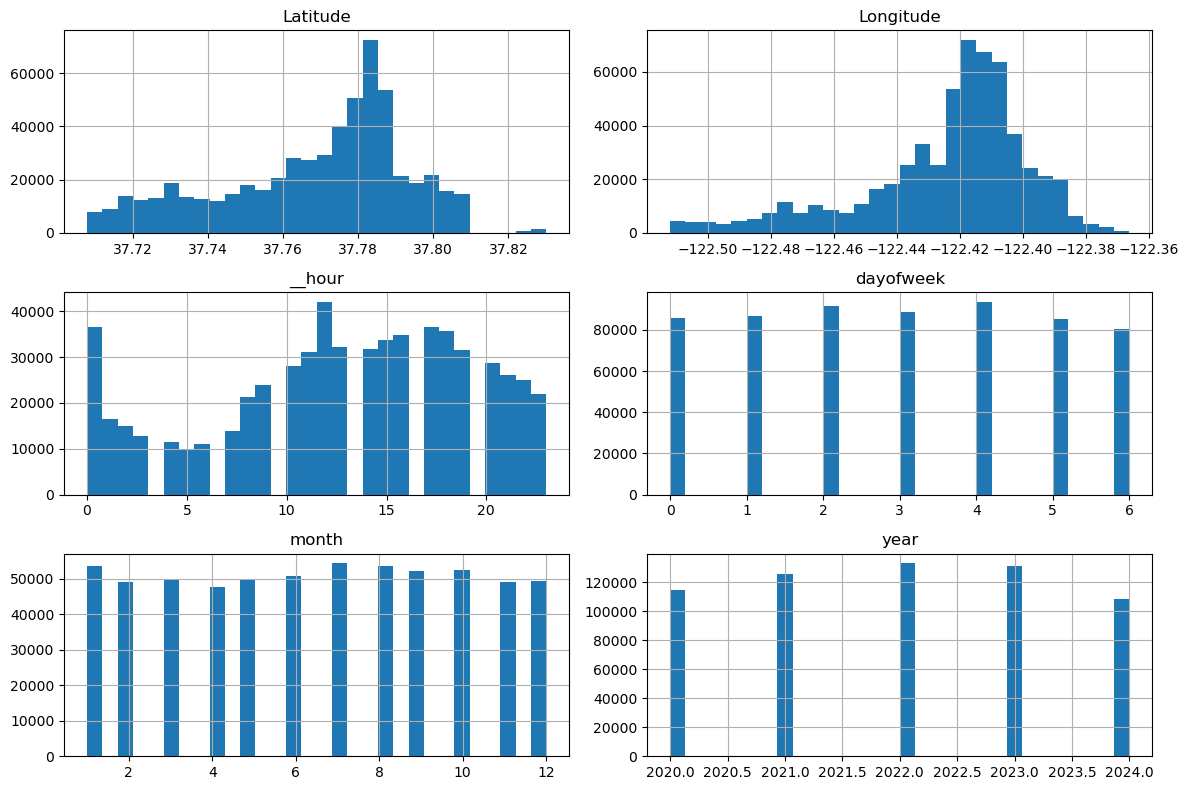

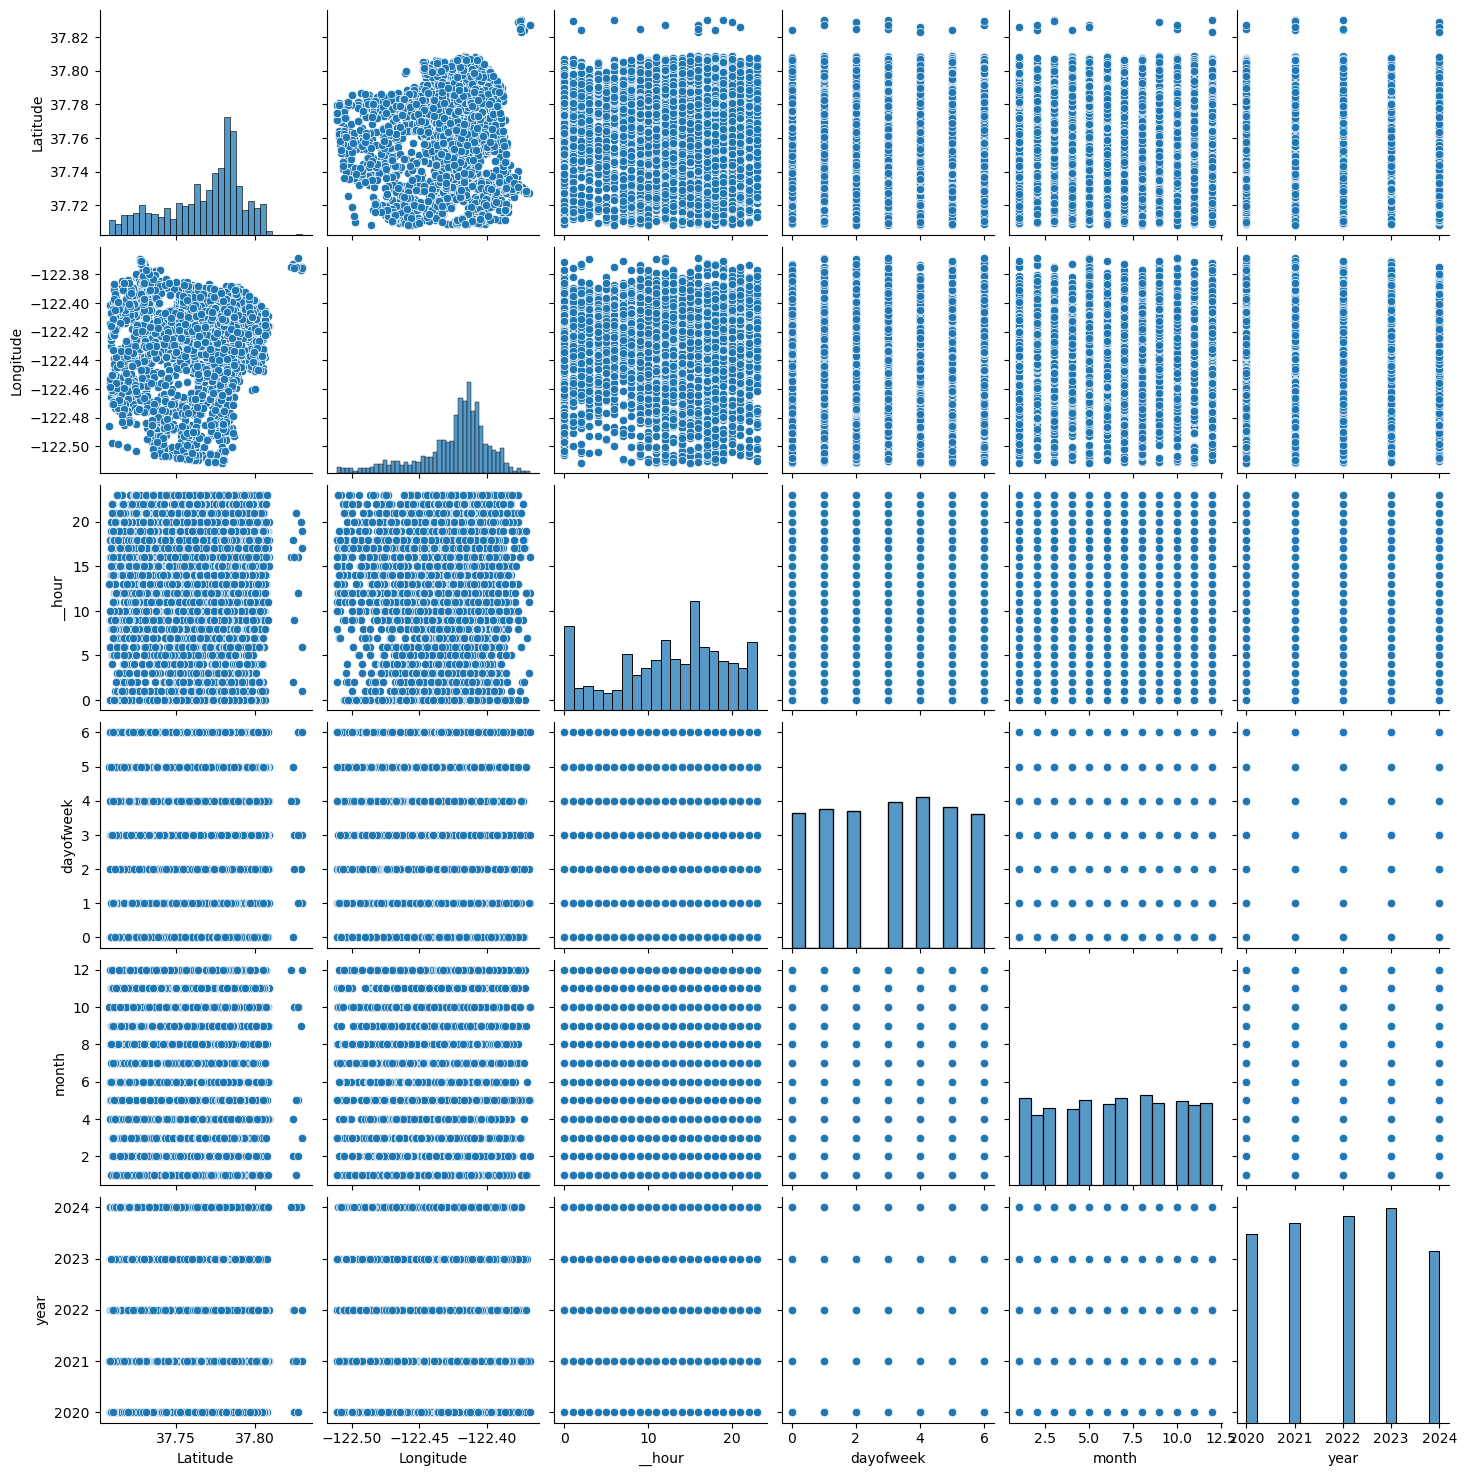

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
_ = dfw[num_cols].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

# Pairwise relationships 
sample = dfw[num_cols].dropna().sample(min(5000, len(dfw)), random_state=42)
sns.pairplot(sample, diag_kind="hist")
plt.show()


In [ ]:
# 3.6 Pearson Correlation heatmap

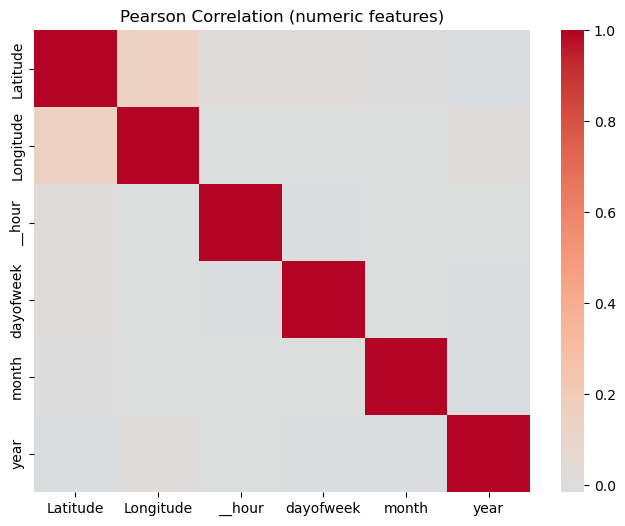

In [26]:
corr = dfw[num_cols].corr(method="pearson")
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Pearson Correlation (numeric features)")
plt.show()


In [ ]:
# 3.7 Temporal Patterns

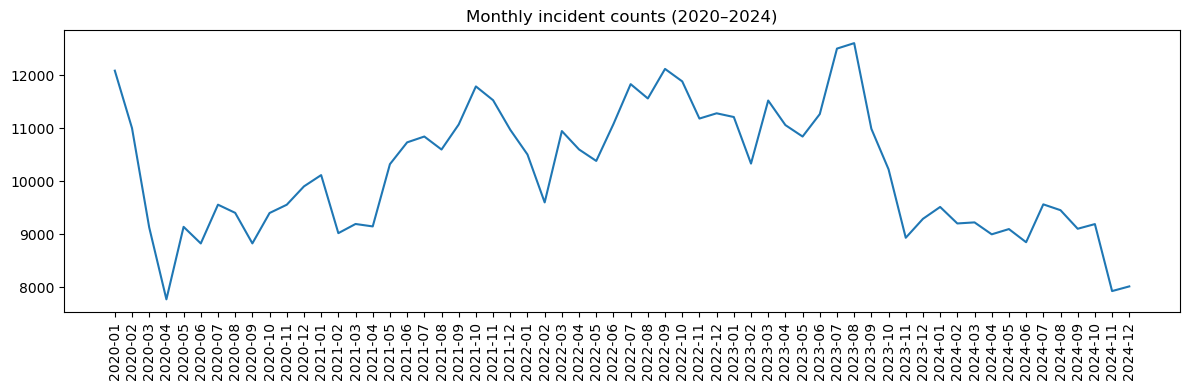

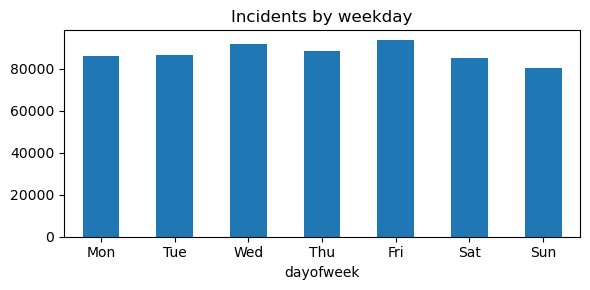

In [27]:
# Counts by month-year
monthly = (dfw
           .assign(ym = dfw["__date"].dt.to_period("M"))
           .groupby("ym").size().rename("count").reset_index())
monthly["ym"] = monthly["ym"].astype(str)

plt.figure(figsize=(12,4))
plt.plot(monthly["ym"], monthly["count"])
plt.xticks(rotation=90)
plt.title("Monthly incident counts (2020–2024)")
plt.tight_layout()
plt.show()

# Weekday distribution
weekday_map = {0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}
weekday_counts = dfw["dayofweek"].map(weekday_map).value_counts().reindex(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

weekday_counts.plot(kind="bar", rot=0, figsize=(6,3), title="Incidents by weekday")
plt.tight_layout()
plt.show()


In [ ]:
#3.8 Save interim cleaned slice for downstream steps

In [28]:
from pathlib import Path

interim_path = Path("/Users/yenkopro/Desktop/bda600-capstone/data/interim/sfpd_2020_2024_clean.parquet")
dfw.to_parquet(interim_path, index=False)
print("Saved interim cleaned dataset to:", interim_path)


Saved interim cleaned dataset to: /Users/yenkopro/Desktop/bda600-capstone/data/interim/sfpd_2020_2024_clean.parquet


In [ ]:
# 4.1 Load cleaned data

In [29]:
import pandas as pd
from pathlib import Path

interim_path = Path("/Users/yenkopro/Desktop/bda600-capstone/data/interim/sfpd_2020_2024_clean.parquet")
df = pd.read_parquet(interim_path)

print("Loaded:", df.shape, "rows × columns")
df.head()


Loaded: (611712, 14) rows × columns


,Analysis Neighborhood,Incident Category,Incident Date,Incident Subcategory,Incident Time,Latitude,Longitude,Police District,__date,__hour,date_only,dayofweek,month,year
0,Mission,Burglary,2024/09/15,Burglary - Commercial,06:08,37.760300,-122.418121,Mission,2024-09-15,6,2024-09-15,6,9,2024
1,Mission,Case Closure,2024/12/23,Case Closure,14:20,37.756104,-122.421043,Mission,2024-12-23,14,2024-12-23,0,12,2024
2,Mission,Case Closure,2024/09/15,Case Closure,06:08,37.760300,-122.418121,Mission,2024-09-15,6,2024-09-15,6,9,2024
3,Mission,Lost Property,2024/11/01,Lost Property,12:00,37.762917,-122.421692,Mission,2024-11-01,12,2024-11-01,4,11,2024
4,Mission,Motor Vehicle Theft,2024/09/01,Motor Vehicle Theft,12:00,37.770897,-122.414993,Mission,2024-09-01,12,2024-09-01,6,9,2024


In [ ]:
# 4.2 Identifying Key columns

In [30]:
cols = df.columns

DATE_COL = "__date" if "__date" in cols else "Incident Date"
CAT_COL  = "Incident Category" if "Incident Category" in cols else None
DIST_COL = "Police District" if "Police District" in cols else None

subset_cols = [c for c in [DATE_COL, CAT_COL, DIST_COL, "__hour", "year", "month", "dayofweek"] if c in cols]
df = df[subset_cols].copy()
print(df.sample(5))


           __date    Incident Category Police District  __hour  year  month  \
466493 2022-12-23    Recovered Vehicle      Tenderloin       2  2022     12   
316862 2023-08-16                Fraud        Southern      12  2023      8   
604847 2022-01-17        Larceny Theft         Bayview       0  2022      1   
517835 2023-05-18   Malicious Mischief         Bayview       1  2023      5   
412413 2024-08-14  Other Miscellaneous        Northern       4  2024      8   

        dayofweek  
466493          4  
316862          2  
604847          0  
517835          3  
412413          2  


In [ ]:
# 4.3 Aggregate to daily counts

In [31]:
# Group by day
daily = (
    df.groupby([DATE_COL, DIST_COL, CAT_COL])
      .size()
      .rename("count")
      .reset_index()
)

daily[DATE_COL] = pd.to_datetime(daily[DATE_COL])
daily["year"] = daily[DATE_COL].dt.year
daily["month"] = daily[DATE_COL].dt.month
daily["dayofweek"] = daily[DATE_COL].dt.dayofweek
print("Daily-level dataset shape:", daily.shape)
daily.head()


Daily-level dataset shape: (232599, 7)


,__date,Police District,Incident Category,count,year,month,dayofweek
0,2020-01-01,Bayview,Arson,1,2020,1,2
1,2020-01-01,Bayview,Assault,2,2020,1,2
2,2020-01-01,Bayview,Burglary,2,2020,1,2
3,2020-01-01,Bayview,Disorderly Conduct,2,2020,1,2
4,2020-01-01,Bayview,Fraud,10,2020,1,2


In [ ]:
#4.4 Add Lag Features (1-day & 7-day)

In [32]:
# Ensure chronological order within each group
daily = daily.sort_values([DIST_COL, CAT_COL, DATE_COL])

# Create 1-day and 7-day lag features
daily["lag1"] = (
    daily.groupby([DIST_COL, CAT_COL])["count"]
         .shift(1)
)

daily["lag7"] = (
    daily.groupby([DIST_COL, CAT_COL])["count"]
         .shift(7)
)

# Check
daily[["count", "lag1", "lag7"]].head(10)


,count,lag1,lag7
0,1,NaN,NaN
849,1,1.0,NaN
2503,1,1.0,NaN
3416,1,1.0,NaN
5439,1,1.0,NaN
7635,1,1.0,NaN
8186,1,1.0,NaN
8353,1,1.0,1.0
10818,1,1.0,1.0
11042,1,1.0,1.0


In [ ]:
#4.5 Weekend & Holiday features

In [34]:
# holiday library 
%pip install --quiet holidays



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
# Weekend flag
daily["is_weekend"] = daily[DATE_COL].dt.dayofweek.isin([5, 6]).astype(int)

# Holiday flag (normalized datetime vs DatetimeIndex)
import holidays
us_holidays = holidays.US(years=range(2020, 2025))
holi_index = pd.to_datetime(list(us_holidays.keys()))  # DatetimeIndex (ns)

daily["is_holiday"] = daily[DATE_COL].dt.normalize().isin(holi_index).astype(int)

daily[[DATE_COL, "is_weekend", "is_holiday"]].sample(10, random_state=42)


,__date,is_weekend,is_holiday
117897,2022-07-22,0,0
96062,2022-02-02,0,0
192397,2024-02-11,1,0
187513,2024-01-03,0,0
75536,2021-08-25,0,0
156337,2023-05-09,0,0
190378,2024-01-26,0,0
189780,2024-01-22,0,0
208096,2024-06-14,0,0
168316,2023-08-08,0,0


In [ ]:
# 4.6 Define Target (y-high) via Rolling 75th Percentile

In [36]:
import pandas as pd
import numpy as np

daily = daily.sort_values([DIST_COL, CAT_COL, DATE_COL]).reset_index(drop=True)

# Rolling 28-day 75th percentile per District×Category
# Use min_periods=14 so early days still produce a quantile once we have 2 weeks of history
daily["rolling_q75"] = (
    daily.groupby([DIST_COL, CAT_COL])["count"]
         .transform(lambda s: s.rolling(window=28, min_periods=14).quantile(0.75))
)

# Define the classification target
daily["y_high"] = (daily["count"] >= daily["rolling_q75"]).astype("Int8")

# Quick sanity checks
print("Share of y_high=1 overall:", float(daily["y_high"].mean(skipna=True)))
print(daily[[DATE_COL, DIST_COL, CAT_COL, "count", "rolling_q75", "y_high"]].head(10))


Share of y_high=1 overall: 0.4465410427387908
      __date Police District Incident Category  count  rolling_q75  y_high
0 2020-01-01         Bayview             Arson      1          NaN       0
1 2020-01-07         Bayview             Arson      1          NaN       0
2 2020-01-19         Bayview             Arson      1          NaN       0
3 2020-01-26         Bayview             Arson      1          NaN       0
4 2020-02-10         Bayview             Arson      1          NaN       0
5 2020-02-26         Bayview             Arson      1          NaN       0
6 2020-03-01         Bayview             Arson      1          NaN       0
7 2020-03-02         Bayview             Arson      1          NaN       0
8 2020-03-21         Bayview             Arson      1          NaN       0
9 2020-03-23         Bayview             Arson      1          NaN       0


In [ ]:
# 4.7 Missing Values From Lags/Rolling

In [ ]:
# We need to drop rows with missing predictors to avoid leakage.

In [37]:
before = daily.shape[0]

# Drop rows missing any of the critical features or the target
needed = ["lag1", "lag7", "rolling_q75", "y_high"]
daily_clean = daily.dropna(subset=needed).reset_index(drop=True)

after = daily_clean.shape[0]
print(f"Rows before: {before:,}  |  after dropping early-NaNs: {after:,}  |  removed: {before-after:,}")

# class balance report
print(daily_clean["y_high"].value_counts(normalize=True).rename("share"))


Rows before: 232,599  |  after dropping early-NaNs: 226,849  |  removed: 5,750
y_high
0    0.54214
1    0.45786
Name: share, dtype: Float64


In [ ]:
# Save progress

In [38]:
from pathlib import Path

processed_path = Path("/Users/yenkopro/Desktop/bda600-capstone/data/processed/sfpd_daily_features.parquet")
daily_clean.to_parquet(processed_path, index=False)

# small CSV sample for quick inspection / sharing
sample_path = Path("/Users/yenkopro/Desktop/bda600-capstone/data/processed/sfpd_daily_features_sample.csv")
daily_clean.sample(min(2000, len(daily_clean)), random_state=42).to_csv(sample_path, index=False)

print("Saved full processed dataset to:", processed_path)
print("Saved sample (up to 2k rows) to:", sample_path)

# columns we’ll use next
daily_clean.columns.tolist()


Saved full processed dataset to: /Users/yenkopro/Desktop/bda600-capstone/data/processed/sfpd_daily_features.parquet
Saved sample (up to 2k rows) to: /Users/yenkopro/Desktop/bda600-capstone/data/processed/sfpd_daily_features_sample.csv


['__date',
 'Police District',
 'Incident Category',
 'count',
 'year',
 'month',
 'dayofweek',
 'lag1',
 'lag7',
 'is_weekend',
 'is_holiday',
 'rolling_q75',
 'y_high']

In [ ]:
# 5.1 Loading the dataset

In [39]:
import pandas as pd
from pathlib import Path

processed_path = Path("/Users/yenkopro/Desktop/bda600-capstone/data/processed/sfpd_daily_features.parquet")
df = pd.read_parquet(processed_path)

print("Loaded processed dataset:", df.shape)
df.head()


Loaded processed dataset: (226849, 13)


,__date,Police District,Incident Category,count,year,month,dayofweek,lag1,lag7,is_weekend,is_holiday,rolling_q75,y_high
0,2020-05-07,Bayview,Arson,1,2020,5,3,1.0,1.0,0,0,1.0,1
1,2020-05-28,Bayview,Arson,1,2020,5,3,1.0,1.0,0,0,1.0,1
2,2020-05-31,Bayview,Arson,1,2020,5,6,1.0,1.0,1,0,1.0,1
3,2020-06-02,Bayview,Arson,1,2020,6,1,1.0,1.0,0,0,1.0,1
4,2020-06-05,Bayview,Arson,1,2020,6,4,1.0,1.0,0,0,1.0,1


In [ ]:
#5.2 Inspecting the Date Range

In [40]:
DATE_COL = "__date" if "__date" in df.columns else "Incident Date"
print("Date range:", df[DATE_COL].min(), "→", df[DATE_COL].max())


Date range: 2020-01-14 00:00:00 → 2024-12-31 00:00:00


In [ ]:
#5.3 Chronological split

In [41]:
# 80% of Dates for Training, 10% for validation, and 10% for testing.

In [ ]:
# All this is going to be based on time order.

In [42]:
# Sort chronologically
df = df.sort_values(DATE_COL)

# Compute split boundaries
n = len(df)
train_end = int(0.8 * n)
val_end = int(0.9 * n)

# Partition
train_df = df.iloc[:train_end]
val_df   = df.iloc[train_end:val_end]
test_df  = df.iloc[val_end:]

print(f"Train: {len(train_df):,} rows | Val: {len(val_df):,} rows | Test: {len(test_df):,} rows")

# Sanity check on dates
print("Train:", train_df[DATE_COL].min(), "→", train_df[DATE_COL].max())
print("Val:", val_df[DATE_COL].min(), "→", val_df[DATE_COL].max())
print("Test:", test_df[DATE_COL].min(), "→", test_df[DATE_COL].max())


Train: 181,479 rows | Val: 22,685 rows | Test: 22,685 rows
Train: 2020-01-14 00:00:00 → 2023-12-31 00:00:00
Val: 2023-12-31 00:00:00 → 2024-06-28 00:00:00
Test: 2024-06-28 00:00:00 → 2024-12-31 00:00:00


In [ ]:
# 5.4 Save the partitioned sets

In [43]:
split_dir = Path("/Users/yenkopro/Desktop/bda600-capstone/data/processed/")
train_df.to_parquet(split_dir / "sfpd_train.parquet", index=False)
val_df.to_parquet(split_dir / "sfpd_val.parquet", index=False)
test_df.to_parquet(split_dir / "sfpd_test.parquet", index=False)

print("Saved train/val/test splits to:", split_dir)


Saved train/val/test splits to: /Users/yenkopro/Desktop/bda600-capstone/data/processed


In [ ]:
# 6.1 Load Data and confirm Columns

In [44]:
import pandas as pd
from pathlib import Path

processed_path = Path("/Users/yenkopro/Desktop/bda600-capstone/data/processed/sfpd_daily_features.parquet")
df = pd.read_parquet(processed_path)
print("Loaded processed dataset:", df.shape)

# Confirm important columns
df.columns.tolist()


Loaded processed dataset: (226849, 13)


['__date',
 'Police District',
 'Incident Category',
 'count',
 'year',
 'month',
 'dayofweek',
 'lag1',
 'lag7',
 'is_weekend',
 'is_holiday',
 'rolling_q75',
 'y_high']

In [ ]:
# 6.2 Feature Definition and Target

In [45]:
DATE_COL = "__date" if "__date" in df.columns else "Incident Date"
TARGET = "y_high"

# Define feature groups
cat_features = ["Police District", "Incident Category"]
num_features = ["lag1", "lag7", "is_weekend", "is_holiday", "month", "dayofweek"]

# Separate predictors and target
X = df[cat_features + num_features]
y = df[TARGET]

print("X shape:", X.shape)
print("y distribution:\n", y.value_counts(normalize=True))


X shape: (226849, 8)
y distribution:
 y_high
0    0.54214
1    0.45786
Name: proportion, dtype: Float64


In [ ]:
# 6.3 Split back into Train, Val and Test

In [46]:
train_df = pd.read_parquet("/Users/yenkopro/Desktop/bda600-capstone/data/processed/sfpd_train.parquet")
val_df   = pd.read_parquet("/Users/yenkopro/Desktop/bda600-capstone/data/processed/sfpd_val.parquet")
test_df  = pd.read_parquet("/Users/yenkopro/Desktop/bda600-capstone/data/processed/sfpd_test.parquet")

X_train = train_df[cat_features + num_features]
y_train = train_df[TARGET]

X_val = val_df[cat_features + num_features]
y_val = val_df[TARGET]

X_test = test_df[cat_features + num_features]
y_test = test_df[TARGET]

print("Train:", X_train.shape, "| Val:", X_val.shape, "| Test:", X_test.shape)


Train: (181479, 8) | Val: (22685, 8) | Test: (22685, 8)


In [ ]:
# 6.4 Preprocessing Pipeline

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Numeric pipeline
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

# Combine into one ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_features),
        ("cat", categorical_pipeline, cat_features)
    ]
)

print("Preprocessing pipeline created successfully.")


Preprocessing pipeline created successfully.


In [ ]:
# 6.5 Fit the pipeline 

In [49]:
# Fit on training data
preprocessor.fit(X_train)

# Transform validation data (sanity check)
X_val_transformed = preprocessor.transform(X_val)
print("Transformed validation shape:", X_val_transformed.shape)


Transformed validation shape: (22685, 59)


In [ ]:
# 6.6 Save the fitted preprocessor 

In [50]:
import joblib
joblib.dump(preprocessor, "/Users/yenkopro/Desktop/bda600-capstone/models/preprocessor.joblib")
print("Saved preprocessor pipeline to: models/preprocessor.joblib")


Saved preprocessor pipeline to: models/preprocessor.joblib


In [ ]:
# 7.1 Decision Tree: Baseline pipeline

In [ ]:
# Full modeling pipeline

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# Baseline classifier (we’ll tune in the next step)
tree_clf = DecisionTreeClassifier(
    random_state=42,
    class_weight=None  # we can revisit if class imbalance is severe
)

# Full pipeline: preprocessing → estimator
pipe_tree = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", tree_clf)
])

pipe_tree



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['lag1', 'lag7', 'is_weekend',
                                                   'is_holiday', 'month',
                                                   'dayofweek']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Police District',
                                                   'Incident Category'])])),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [ ]:
# 7.2 Fit on Training Split

In [53]:
pipe_tree.fit(X_train, y_train)
print("Baseline Decision Tree trained on TRAIN split.")


Baseline Decision Tree trained on TRAIN split.


In [ ]:
# 7.3 Evaluation helpers (metricts + plots)

In [57]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)

def evaluate_classifier(model, X, y_true, name="Model", threshold=None):
    """
    Prints metrics for a classifier. If threshold is provided, it will
    threshold predict_proba[:,1]; otherwise uses model.predict().
    """
    # Predict labels
    if threshold is None:
        y_pred = model.predict(X)
    else:
        if hasattr(model.named_steps["clf"], "predict_proba"):
            proba = model.predict_proba(X)[:, 1]
            y_pred = (proba >= threshold).astype(int)
        else:
            y_pred = model.predict(X)

    # Probability scores for ROC-AUC
    y_scores = None
    if hasattr(model.named_steps["clf"], "predict_proba"):
        y_scores = model.predict_proba(X)[:, 1]

    print(f"\n {name} metrics")
    print("-"*40)
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print("Macro-F1:", round(f1_score(y_true, y_pred, average='macro'), 4))
    if y_scores is not None and len(np.unique(y_true)) == 2:
        try:
            print("ROC-AUC:", round(roc_auc_score(y_true, y_scores), 4))
        except Exception as e:
            print("ROC-AUC: n/a (", e, ")")
    print("\nClassification report:\n", classification_report(y_true, y_pred, digits=3))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))


In [ ]:
# 7.4 Validate on VAL split (baseline)

In [58]:
# Train-set to detect overfitting
evaluate_classifier(pipe_tree, X_train, y_train, name="Decision Tree (TRAIN)")

# Validation-set performance
evaluate_classifier(pipe_tree, X_val, y_val, name="Decision Tree (VAL)")



 Decision Tree (TRAIN) metrics
----------------------------------------
Accuracy: 0.8893
Macro-F1: 0.8868
ROC-AUC: 0.973

Classification report:
               precision    recall  f1-score   support

         0.0      0.857     0.956     0.904     98558
         1.0      0.939     0.811     0.870     82921

    accuracy                          0.889    181479
   macro avg      0.898     0.883     0.887    181479
weighted avg      0.894     0.889     0.888    181479

Confusion matrix:
 [[94175  4383]
 [15702 67219]]

 Decision Tree (VAL) metrics
----------------------------------------
Accuracy: 0.583
Macro-F1: 0.578
ROC-AUC: 0.5876

Classification report:
               precision    recall  f1-score   support

         0.0      0.602     0.648     0.624     12113
         1.0      0.558     0.509     0.532     10572

    accuracy                          0.583     22685
   macro avg      0.580     0.578     0.578     22685
weighted avg      0.581     0.583     0.581     22685

Confu

In [ ]:
# 7.5 Threshold sweep on validation

In [59]:
import numpy as np
from sklearn.metrics import f1_score

best_thr, best_f1 = 0.5, -1
thr_grid = np.linspace(0.2, 0.8, 25)

if hasattr(pipe_tree.named_steps["clf"], "predict_proba"):
    val_scores = pipe_tree.predict_proba(X_val)[:, 1]
    for t in thr_grid:
        y_pred_thr = (val_scores >= t).astype(int)
        f1 = f1_score(y_val, y_pred_thr, average="macro")
        if f1 > best_f1:
            best_f1, best_thr = f1, t

    print(f"🔎 Best F1 on VAL at threshold {best_thr:.3f} = {best_f1:.4f}")
    # Evaluate at that threshold
    evaluate_classifier(pipe_tree, X_val, y_val, name="Decision Tree (VAL @ best threshold)", threshold=best_thr)
else:
    print("Model does not provide predict_proba; skipping threshold sweep.")


🔎 Best F1 on VAL at threshold 0.575 = 0.5783

 Decision Tree (VAL @ best threshold) metrics
----------------------------------------
Accuracy: 0.5833
Macro-F1: 0.5783
ROC-AUC: 0.5876

Classification report:
               precision    recall  f1-score   support

         0.0      0.602     0.649     0.625     12113
         1.0      0.558     0.508     0.532     10572

    accuracy                          0.583     22685
   macro avg      0.580     0.579     0.578     22685
weighted avg      0.582     0.583     0.581     22685

Confusion matrix:
 [[7860 4253]
 [5199 5373]]


In [ ]:
#7.6 Log baseline run to MLflow

In [60]:
import mlflow, mlflow.sklearn
mlflow.set_experiment("bda600_sfpd_temporal")

with mlflow.start_run(run_name="baseline_decision_tree"):
    # Params
    mlflow.log_param("model", "DecisionTreeClassifier")
    mlflow.log_param("class_weight", str(tree_clf.class_weight))
    mlflow.log_param("random_state", tree_clf.random_state)

    # Metrics on validation
    from sklearn.metrics import f1_score
    y_val_pred = pipe_tree.predict(X_val)
    macro_f1_val = f1_score(y_val, y_val_pred, average="macro")
    mlflow.log_metric("macro_f1_val", macro_f1_val)

    # Save model
    mlflow.sklearn.log_model(pipe_tree, artifact_path="model")

print("Logged baseline run to MLflow (see mlruns/).")


2025/10/31 12:22:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/31 12:22:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged baseline run to MLflow (see mlruns/).


In [ ]:
# 8 Hyperparameters Tuning (Decision Tree + Cross-Validation)

In [ ]:
# 8.1 Setup Baseline pipeline + TimeSeriesSplit

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import TimeSeriesSplit

# Rebuild a clean base pipeline (reusing your fitted `preprocessor`)
base_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("clf", DecisionTreeClassifier(random_state=42))
])

# Time-aware CV (no shuffling)
tscv = TimeSeriesSplit(n_splits=5)
tscv


TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

In [ ]:
# 8.2 GridSearch

In [62]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "clf__criterion": ["gini", "entropy", "log_loss"],
    "clf__max_depth": [3, 5, 8, 12, 16, None],
    "clf__min_samples_split": [2, 5, 10, 20, 40],
    "clf__min_samples_leaf": [1, 2, 5, 10, 20],
    "clf__ccp_alpha": [0.0, 0.0005, 0.001, 0.005, 0.01]
}

grid = GridSearchCV(
    estimator=base_pipe,
    param_grid=grid_params,
    scoring="f1_macro",
    cv=tscv,
    n_jobs=-1,
    verbose=1,
    refit=True # refit on full TRAIN after CV
)

grid.fit(X_train, y_train)
print("GridSearchCV done.")
print("Best CV macro-F1:", round(grid.best_score_, 4))
print("Best params:", grid.best_params_)
best_grid = grid.best_estimator_


Fitting 5 folds for each of 2250 candidates, totalling 11250 fits
GridSearchCV done.
Best CV macro-F1: 0.6042
Best params: {'clf__ccp_alpha': 0.0, 'clf__criterion': 'entropy', 'clf__max_depth': 16, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 40}


In [63]:
evaluate_classifier(best_grid, X_val, y_val, name="GridSearch best (VAL)")



 GridSearch best (VAL) metrics
----------------------------------------
Accuracy: 0.6242
Macro-F1: 0.6124
ROC-AUC: 0.6544

Classification report:
               precision    recall  f1-score   support

         0.0      0.623     0.748     0.680     12113
         1.0      0.626     0.482     0.545     10572

    accuracy                          0.624     22685
   macro avg      0.624     0.615     0.612     22685
weighted avg      0.624     0.624     0.617     22685

Confusion matrix:
 [[9060 3053]
 [5472 5100]]


In [ ]:
# 8.3 Randomized Search 

In [64]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

rand_dist = {
    "clf__criterion": ["gini", "entropy", "log_loss"],
    "clf__max_depth": [None] + list(np.arange(3, 31)),       # 3..30 + None
    "clf__min_samples_split": np.arange(2, 81),               # 2..80
    "clf__min_samples_leaf": np.arange(1, 41),                # 1..40
    "clf__ccp_alpha": np.linspace(0, 0.02, 81)                # 0..0.02
}

rand = RandomizedSearchCV(
    estimator=base_pipe,
    param_distributions=rand_dist,
    n_iter=120,                 # adjust if needed (time vs. breadth)
    scoring="f1_macro",
    cv=tscv,
    n_jobs=-1,
    random_state=42,
    verbose=1,
    refit=True
)

rand.fit(X_train, y_train)
print("RandomizedSearchCV done.")
print("Best CV macro-F1:", round(rand.best_score_, 4))
print("Best params:", rand.best_params_)
best_rand = rand.best_estimator_


Fitting 5 folds for each of 120 candidates, totalling 600 fits
RandomizedSearchCV done.
Best CV macro-F1: 0.6002
Best params: {'clf__min_samples_split': 78, 'clf__min_samples_leaf': 1, 'clf__max_depth': 30, 'clf__criterion': 'log_loss', 'clf__ccp_alpha': 0.0}


In [67]:
evaluate_classifier(best_rand, X_val, y_val, name="RandomizedSearch best (VAL)")



 RandomizedSearch best (VAL) metrics
----------------------------------------
Accuracy: 0.6302
Macro-F1: 0.5991
ROC-AUC: 0.6515

Classification report:
               precision    recall  f1-score   support

         0.0      0.610     0.851     0.711     12113
         1.0      0.688     0.378     0.488     10572

    accuracy                          0.630     22685
   macro avg      0.649     0.614     0.599     22685
weighted avg      0.647     0.630     0.607     22685

Confusion matrix:
 [[10305  1808]
 [ 6581  3991]]


In [66]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical

bayes_space = {
    "clf__criterion": Categorical(["gini", "entropy", "log_loss"]),
    "clf__max_depth": Integer(3, 32),
    "clf__min_samples_split": Integer(2, 80),
    "clf__min_samples_leaf": Integer(1, 40),
    "clf__ccp_alpha": Real(1e-6, 2e-2, prior="log-uniform")
}

bayes = BayesSearchCV(
    estimator=base_pipe,
    search_spaces=bayes_space,
    n_iter=80,                 # increase for more thorough search if time allows
    scoring="f1_macro",
    cv=tscv,
    n_jobs=-1,
    random_state=42,
    verbose=1,
    refit=True
)

bayes.fit(X_train, y_train)
print("✅ BayesSearchCV done.")
print("Best CV macro-F1:", round(bayes.best_score_, 4))
print("Best params:", bayes.best_params_)

best_bayes = bayes.best_estimator_


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
#

In [68]:
evaluate_classifier(best_bayes, X_val, y_val, name="BayesSearch best (VAL)")



 BayesSearch best (VAL) metrics
----------------------------------------
Accuracy: 0.6259
Macro-F1: 0.6123
ROC-AUC: 0.6562

Classification report:
               precision    recall  f1-score   support

         0.0      0.622     0.761     0.685     12113
         1.0      0.633     0.471     0.540     10572

    accuracy                          0.626     22685
   macro avg      0.627     0.616     0.612     22685
weighted avg      0.627     0.626     0.617     22685

Confusion matrix:
 [[9223 2890]
 [5597 4975]]


In [ ]:
#8.5 | Compare the winners (VAL)

In [69]:
candidates = {
    "Grid": best_grid,
    "Random": best_rand,
    "Bayes": best_bayes
}

val_scores = {}
for name, model in candidates.items():
    from sklearn.metrics import f1_score
    y_pred = model.predict(X_val)
    val_scores[name] = f1_score(y_val, y_pred, average="macro")

print("VAL Macro-F1 comparison:", {k: round(v, 4) for k, v in val_scores.items()})
best_name = max(val_scores, key=val_scores.get)
best_model = candidates[best_name]
print("Selected model:", best_name)


VAL Macro-F1 comparison: {'Grid': 0.6124, 'Random': 0.5991, 'Bayes': 0.6123}
Selected model: Grid


In [70]:
import mlflow, mlflow.sklearn
from sklearn.metrics import f1_score, accuracy_score

mlflow.set_experiment("bda600_sfpd_temporal")
with mlflow.start_run(run_name=f"decision_tree_tuned_{best_name.lower()}"):
    est = best_model.named_steps["clf"]
    mlflow.log_param("search_method", best_name)
    mlflow.log_param("criterion", getattr(est, "criterion", None))
    mlflow.log_param("max_depth", getattr(est, "max_depth", None))
    mlflow.log_param("min_samples_split", getattr(est, "min_samples_split", None))
    mlflow.log_param("min_samples_leaf", getattr(est, "min_samples_leaf", None))
    mlflow.log_param("ccp_alpha", getattr(est, "ccp_alpha", None))

    y_val_pred = best_model.predict(X_val)
    mlflow.log_metric("macro_f1_val", f1_score(y_val, y_val_pred, average="macro"))
    mlflow.log_metric("accuracy_val", accuracy_score(y_val, y_val_pred))

    mlflow.sklearn.log_model(best_model, artifact_path="model")

print("Tuned model logged to MLflow (see /mlruns directory).")


2025/11/01 10:30:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/01 10:30:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Tuned model logged to MLflow (see /mlruns directory).


In [ ]:
#9.1 | Evaluate on the Test set

In [71]:
# Evaluate the best (GridSearch) model on unseen TEST split
evaluate_classifier(best_grid, X_test, y_test, name="Decision Tree tuned (TEST)")



 Decision Tree tuned (TEST) metrics
----------------------------------------
Accuracy: 0.6271
Macro-F1: 0.6137
ROC-AUC: 0.6555

Classification report:
               precision    recall  f1-score   support

         0.0      0.632     0.749     0.686     12313
         1.0      0.618     0.482     0.542     10372

    accuracy                          0.627     22685
   macro avg      0.625     0.616     0.614     22685
weighted avg      0.626     0.627     0.620     22685

Confusion matrix:
 [[9226 3087]
 [5372 5000]]


In [72]:
#9.2 | Plot Confusion Matrix

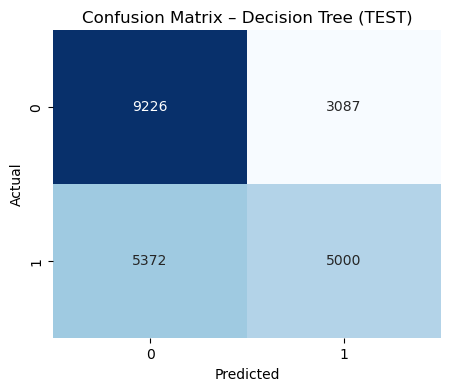

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_test = best_grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix – Decision Tree (TEST)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# 9.3 | Calibration Curve

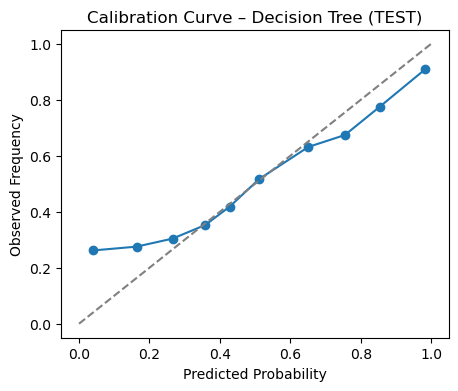

In [74]:
from sklearn.calibration import calibration_curve

if hasattr(best_grid.named_steps["clf"], "predict_proba"):
    y_prob = best_grid.predict_proba(X_test)[:, 1]
    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

    plt.figure(figsize=(5,4))
    plt.plot(prob_pred, prob_true, marker="o")
    plt.plot([0,1],[0,1],"--", color="gray")
    plt.title("Calibration Curve – Decision Tree (TEST)")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Observed Frequency")
    plt.show()
else:
    print("This classifier does not support predict_proba().")


In [ ]:
# 9.4 | Permutation Feature Importance

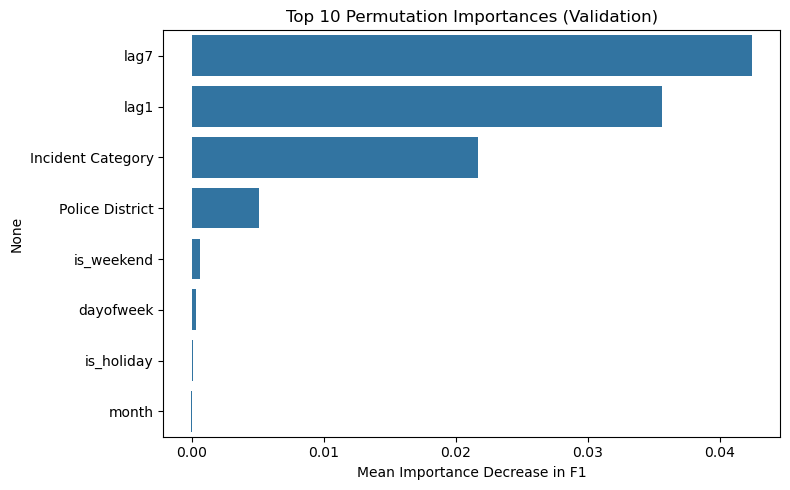

In [75]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    best_grid, X_val, y_val,
    n_repeats=10, random_state=42, scoring="f1_macro"
)

importances = pd.Series(result.importances_mean, index=X_val.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title("Top 10 Permutation Importances (Validation)")
plt.xlabel("Mean Importance Decrease in F1")
plt.tight_layout()
plt.show()


In [ ]:
# 9.5 SHAP local + global interpretability of individual predictions

/var/folders/xb/18k96d3j3yvghgcf4g0bfhs80000gn/T/ipykernel_42329/2641327599.py:42: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_to_plot, X_dense, feature_names=feature_names)
/opt/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/opt/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary

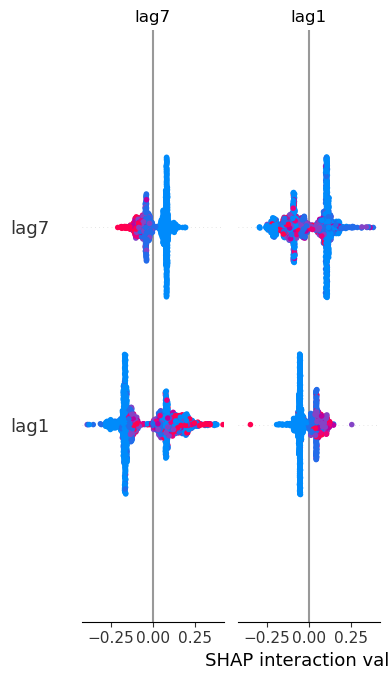

In [77]:
# 9.5 | SHAP Explainability (fixed for sparse -> dense + proper feature names)

import numpy as np
import shap

# ---- sample a manageable subset (speed/memory) ----
rng = np.random.default_rng(42)
idx = rng.choice(len(X_test), size=min(1500, len(X_test)), replace=False)
X_sample = X_test.iloc[idx].copy()
y_sample = y_test.iloc[idx].copy()

# ---- transform with the *preprocessor only* ----
X_prep = preprocessor.transform(X_sample)

# convert to dense float64 (handles sparse matrices)
if hasattr(X_prep, "toarray"):
    X_dense = X_prep.toarray().astype(np.float64)
else:
    X_dense = np.asarray(X_prep, dtype=np.float64)

# ---- recover transformed feature names (num + OHE cat) ----
ohe = preprocessor.named_transformers_["cat"].named_steps["encoder"]
num_names = preprocessor.transformers_[0][2]               # numeric columns list
cat_base = preprocessor.transformers_[1][2]                # original categorical columns
ohe_names = list(ohe.get_feature_names_out(cat_base))      # expanded OHE names
feature_names = list(num_names) + ohe_names                # final names aligned with X_dense

# ---- build explainer on the *tree estimator* (not the pipeline) ----
tree = best_grid.named_steps["clf"]
explainer = shap.TreeExplainer(tree)

# shap_values shape handling (binary returns list of 2 arrays)
shap_values = explainer.shap_values(X_dense)

# pick class-1 SHAP values if list returned
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap_to_plot = shap_values[1]
else:
    shap_to_plot = shap_values

# summary plot (global importance)
shap.summary_plot(shap_to_plot, X_dense, feature_names=feature_names)



/var/folders/xb/18k96d3j3yvghgcf4g0bfhs80000gn/T/ipykernel_42329/4255800416.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_to_plot, X_dense, feature_names=feature_names, max_display=20)
/opt/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/opt/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this war

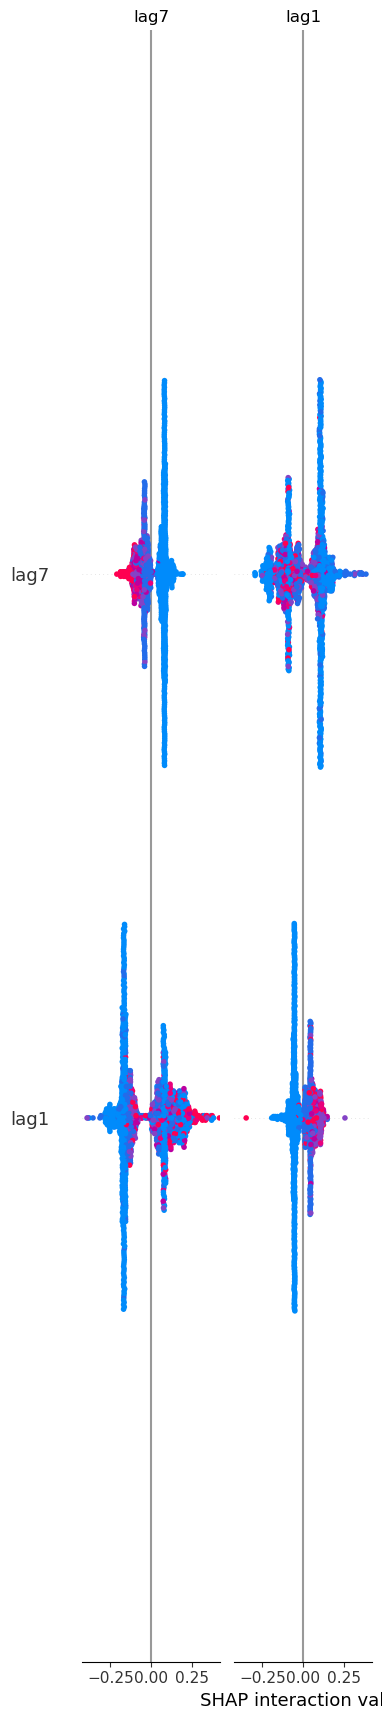

In [78]:
# If shap_values came back as a list (binary classes), pick class 1:
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap_to_plot = shap_values[1]
else:
    shap_to_plot = shap_values

# Beeswarm with top 20 features
shap.summary_plot(shap_to_plot, X_dense, feature_names=feature_names, max_display=20)


/var/folders/xb/18k96d3j3yvghgcf4g0bfhs80000gn/T/ipykernel_42329/1171141482.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_to_plot, X_dense, feature_names=feature_names, plot_type="bar", max_display=20)
/opt/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/opt/anaconda3/lib/python3.12/site-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and

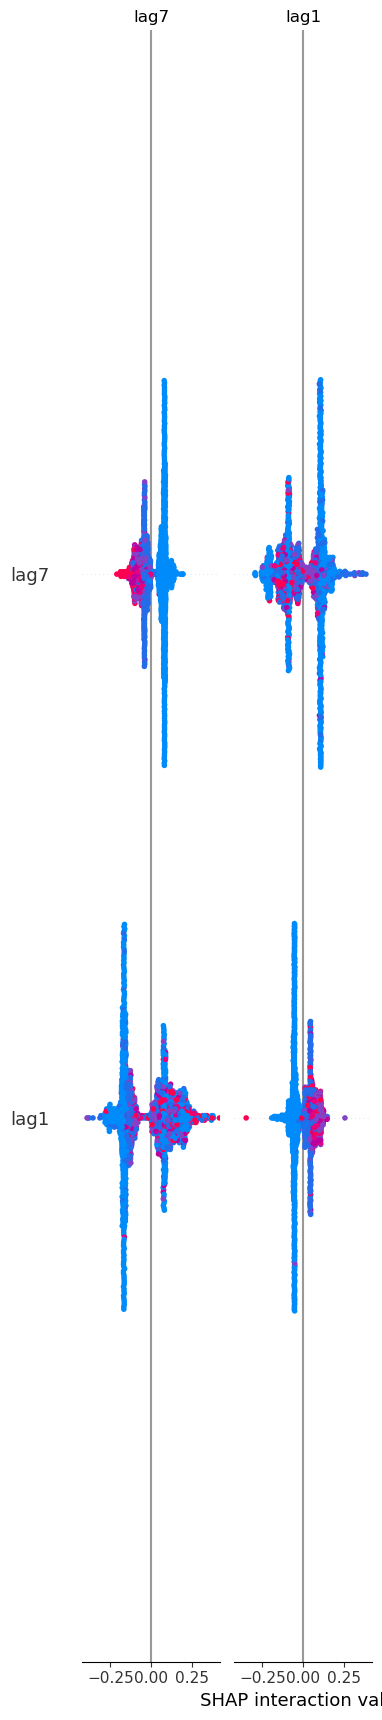

In [79]:
shap.summary_plot(shap_to_plot, X_dense, feature_names=feature_names, plot_type="bar", max_display=20)


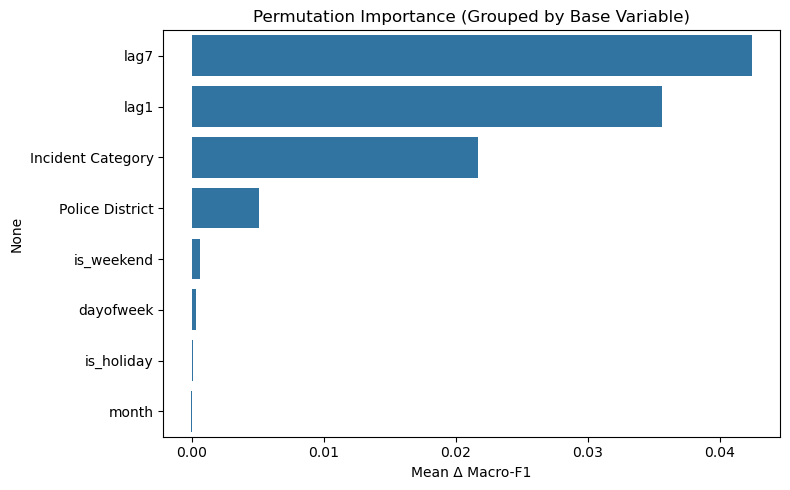

In [80]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Permutation importance on VAL
perm = permutation_importance(best_grid, X_val, y_val, n_repeats=10,
                              random_state=42, scoring="f1_macro")
pi = pd.Series(perm.importances_mean, index=X_val.columns)

# Aggregate One-Hot columns back to their base variable
def base_var(col):
    # matches OneHotEncoder output like 'Police District_<name>' or 'Incident Category_<name>'
    if col.startswith("Police District_"): return "Police District"
    if col.startswith("Incident Category_"): return "Incident Category"
    return col

pi_grouped = pi.groupby(pi.index.map(base_var)).sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=pi_grouped.head(10), y=pi_grouped.head(10).index)
plt.title("Permutation Importance (Grouped by Base Variable)")
plt.xlabel("Mean Δ Macro-F1")
plt.tight_layout()
plt.show()


In [ ]:
# SAVE 

Logged permutation importance plot.


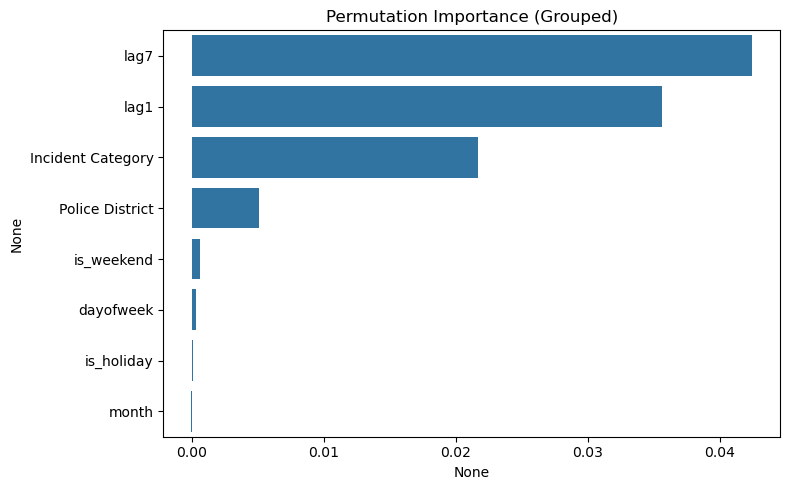

In [81]:
import mlflow
import matplotlib.pyplot as plt

mlflow.set_experiment("bda600_sfpd_temporal")
with mlflow.start_run(run_name="explainability_v1"):
    plt.figure(figsize=(8,5))
    sns.barplot(x=pi_grouped.head(10), y=pi_grouped.head(10).index)
    plt.title("Permutation Importance (Grouped)")
    plt.tight_layout()
    plt.savefig("/Users/yenkopro/Desktop/bda600-capstone/reports/permimp_grouped.png")
    mlflow.log_artifact("/Users/yenkopro/Desktop/bda600-capstone/reports/permimp_grouped.png")
print("Logged permutation importance plot.")


In [ ]:
# 10.1 Daily time series

Prepared daily time series: (1814, 2)


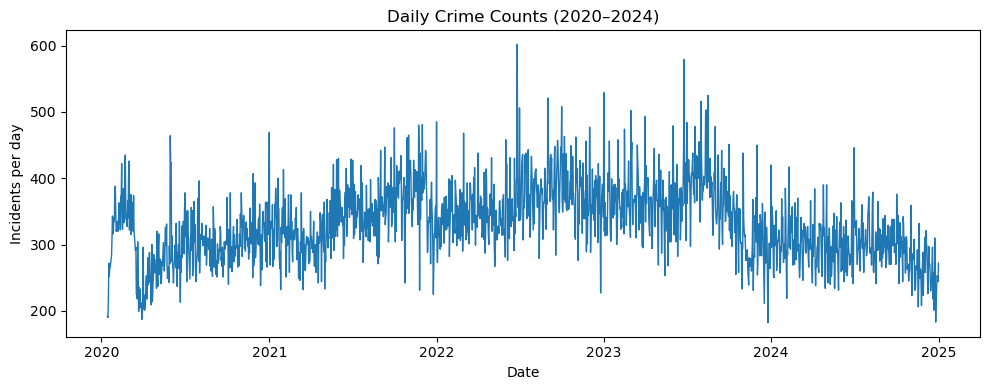

<Figure size 640x480 with 0 Axes>

Saved: /Users/yenkopro/Desktop/bda600-capstone/reports/daily_counts.png


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

processed_path = Path("/Users/yenkopro/Desktop/bda600-capstone/data/processed/sfpd_daily_features.parquet")
df = pd.read_parquet(processed_path)
reports_dir = root / "reports"
reports_dir.mkdir(parents=True, exist_ok=True)

DATE_COL = "__date" if "__date" in df.columns else "Incident Date"
daily_series = df.groupby(DATE_COL)["count"].sum().reset_index().rename(columns={DATE_COL: "ds", "count": "y"})

print("Prepared daily time series:", daily_series.shape)
daily_series.head()

# Plot baseline
plt.figure(figsize=(10,4))
plt.plot(daily_series["ds"], daily_series["y"], linewidth=1)
plt.title("Daily Crime Counts (2020–2024)")
plt.xlabel("Date"); plt.ylabel("Incidents per day")
plt.tight_layout(); plt.show()


out_path = reports_dir / "daily_counts.png"
plt.savefig(out_path, dpi=150)
plt.show()

print("Saved:", out_path)

In [ ]:
#10.2 30-Day forecast (Prophet)

In [88]:
%pip install prophet --quiet



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [89]:
from prophet import Prophet


14:32:56 - cmdstanpy - INFO - Chain [1] start processing
14:32:58 - cmdstanpy - INFO - Chain [1] done processing


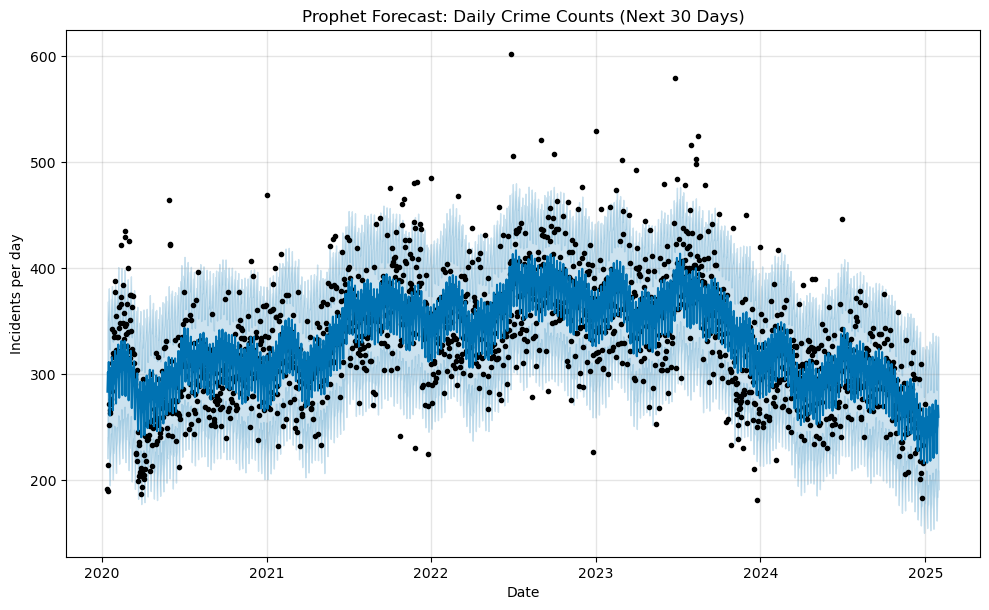

Saved: /Users/yenkopro/Desktop/bda600-capstone/reports/prophet_forecast.png


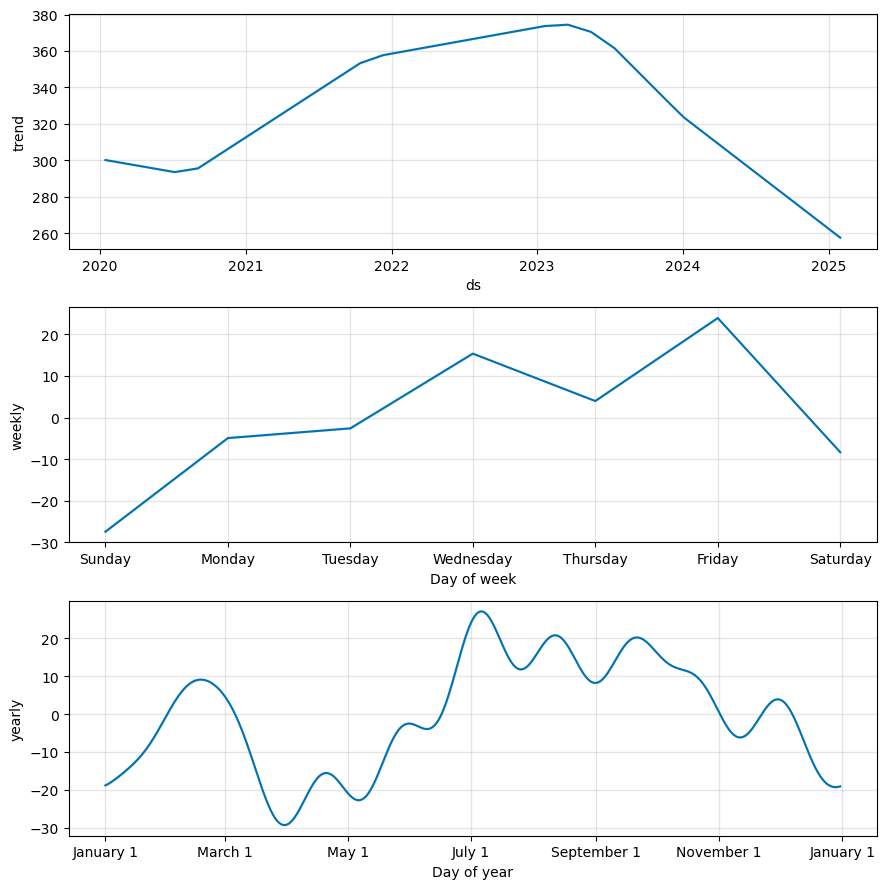

Saved: /Users/yenkopro/Desktop/bda600-capstone/reports/prophet_components.png


In [90]:
from prophet import Prophet
import matplotlib.pyplot as plt
from pathlib import Path

reports_dir = Path("/Users/yenkopro/Desktop/bda600-capstone/reports")

# ---- Fit Prophet ----
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    interval_width=0.9
)

m.fit(daily_series)

# ---- Forecast next 30 days ----
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

# ---- Plot forecast ----
fig1 = m.plot(forecast)
plt.title("Prophet Forecast: Daily Crime Counts (Next 30 Days)")
plt.xlabel("Date"); plt.ylabel("Incidents per day")
out_path1 = reports_dir / "prophet_forecast.png"
fig1.savefig(out_path1, dpi=150, bbox_inches="tight")
plt.show()

print("Saved:", out_path1)

# ---- Plot components (trend + seasonality) ----
fig2 = m.plot_components(forecast)
out_path2 = reports_dir / "prophet_components.png"
fig2.savefig(out_path2, dpi=150, bbox_inches="tight")
plt.show()

print("Saved:", out_path2)


In [ ]:
# 10.3 SARIMAX: Train, Forecast, and Diagnostics

In [ ]:
# 10.3.1 Train/validation

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

reports_dir = Path("/Users/yenkopro/Desktop/bda600-capstone/reports")
reports_dir.mkdir(parents=True, exist_ok=True)

# Ensure datetime index
ts = daily_series.copy()
ts = ts.sort_values("ds").set_index("ds")["y"].asfreq("D")  # daily frequency; fills missing dates with NaN
ts = ts.fillna(0)  # simple fill; alternative: interpolate()

# Hold out the last 60 days for test-like evaluation
h = 60
train_ts = ts.iloc[:-h]
test_ts  = ts.iloc[-h:]

print("Train range:", train_ts.index.min().date(), "→", train_ts.index.max().date(), "| len:", len(train_ts))
print("Test  range:", test_ts.index.min().date(),  "→", test_ts.index.max().date(),  "| len:", len(test_ts))


Train range: 2020-01-14 → 2024-11-01 | len: 1754
Test  range: 2024-11-02 → 2024-12-31 | len: 60


In [ ]:
# 10.3.2 Fit SARIMAX

In [92]:
import statsmodels.api as sm

# A simple, strong baseline: SARIMA with weekly seasonality (s=7)
# order(p,d,q) = (1,1,1) and seasonal_order(P,D,Q,s) = (1,1,1,7) are robust defaults
sarimax_model = sm.tsa.statespace.SARIMAX(
    train_ts,
    order=(1,1,1),
    seasonal_order=(1,1,1,7),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarimax_res = sarimax_model.fit(disp=False)
print(sarimax_res.summary())


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1754
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -8786.508
Date:                           Sat, 01 Nov 2025   AIC                          17583.016
Time:                                   14:49:49   BIC                          17610.315
Sample:                               01-14-2020   HQIC                         17593.111
                                    - 11-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0963      0.026      3.646      0.000       0.045       0.148
ma.L1         -0.8869      0.013    -67.439

In [ ]:
# 10.3.3 Forecast over the held-out window and plot

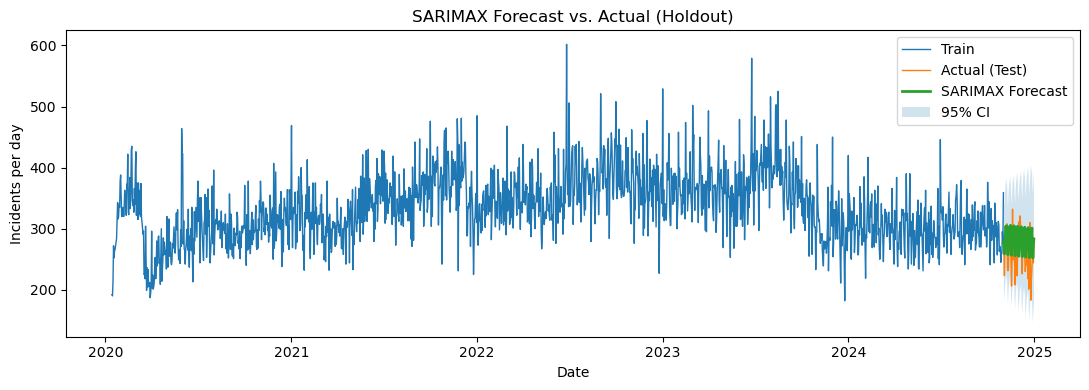

Saved: /Users/yenkopro/Desktop/bda600-capstone/reports/sarimax_forecast.png


In [93]:
# Forecast next h steps (align with test)
pred = sarimax_res.get_forecast(steps=h)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

plt.figure(figsize=(11,4))
plt.plot(train_ts.index, train_ts, label="Train", linewidth=1)
plt.plot(test_ts.index, test_ts, label="Actual (Test)", linewidth=1)
plt.plot(test_ts.index, pred_mean, label="SARIMAX Forecast", linewidth=2)
plt.fill_between(test_ts.index, pred_ci["lower y"], pred_ci["upper y"], alpha=0.2, label="95% CI")
plt.title("SARIMAX Forecast vs. Actual (Holdout)")
plt.xlabel("Date"); plt.ylabel("Incidents per day"); plt.legend()
plt.tight_layout()

out_path = reports_dir / "sarimax_forecast.png"
plt.savefig(out_path, dpi=150, bbox_inches="tight")
plt.show()
print("Saved:", out_path)


In [ ]:
# 10.3.4 Histogram + ACF/PACF

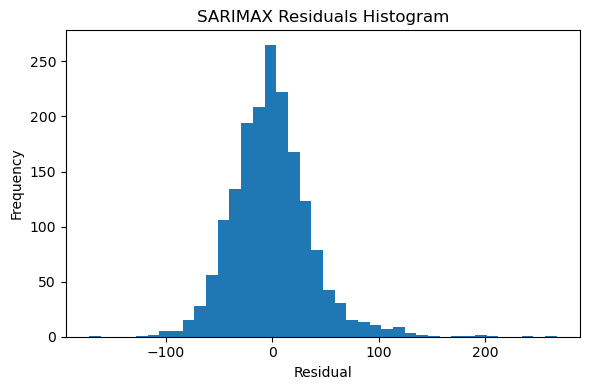

Saved: /Users/yenkopro/Desktop/bda600-capstone/reports/sarimax_residuals_hist.png


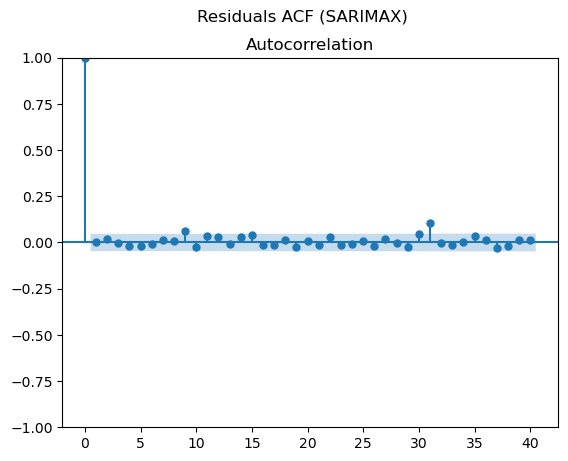

Saved: /Users/yenkopro/Desktop/bda600-capstone/reports/sarimax_residuals_acf.png


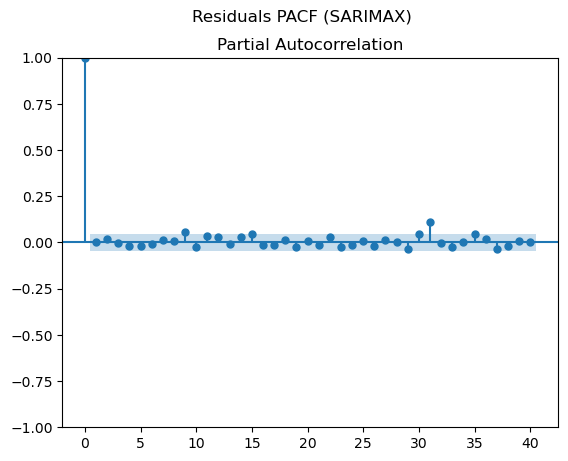

Saved: /Users/yenkopro/Desktop/bda600-capstone/reports/sarimax_residuals_pacf.png


In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

resid = sarimax_res.resid.dropna()

# Histogram of residuals
plt.figure(figsize=(6,4))
plt.hist(resid, bins=40)
plt.title("SARIMAX Residuals Histogram")
plt.xlabel("Residual"); plt.ylabel("Frequency")
plt.tight_layout()
out_hist = reports_dir / "sarimax_residuals_hist.png"
plt.savefig(out_hist, dpi=150, bbox_inches="tight")
plt.show()
print("Saved:", out_hist)

# ACF / PACF of residuals
fig_acf = plot_acf(resid, lags=40)
fig_acf.suptitle("Residuals ACF (SARIMAX)")
out_acf = reports_dir / "sarimax_residuals_acf.png"
fig_acf.savefig(out_acf, dpi=150, bbox_inches="tight")
plt.show()
print("Saved:", out_acf)

fig_pacf = plot_pacf(resid, lags=40)
fig_pacf.suptitle("Residuals PACF (SARIMAX)")
out_pacf = reports_dir / "sarimax_residuals_pacf.png"
fig_pacf.savefig(out_pacf, dpi=150, bbox_inches="tight")
plt.show()
print("Saved:", out_pacf)


In [ ]:
# 10.3.5 Forecast Accuracy (MAE/RMSE/MAPE)

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = test_ts.values
y_pred = pred_mean.values

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mape = (np.abs((y_true - y_pred) / np.maximum(y_true, 1e-6))).mean() * 100  # avoid divide-by-zero

print({"MAE": round(mae,3), "RMSE": round(rmse,3), "MAPE(%)": round(mape,2)})


{'MAE': 30.189, 'RMSE': 37.085, 'MAPE(%)': 12.58}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [97]:
%pip install pmdarima --quiet



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


auto_arima order: (1, 1, 1) seasonal_order: (0, 0, 2, 7)


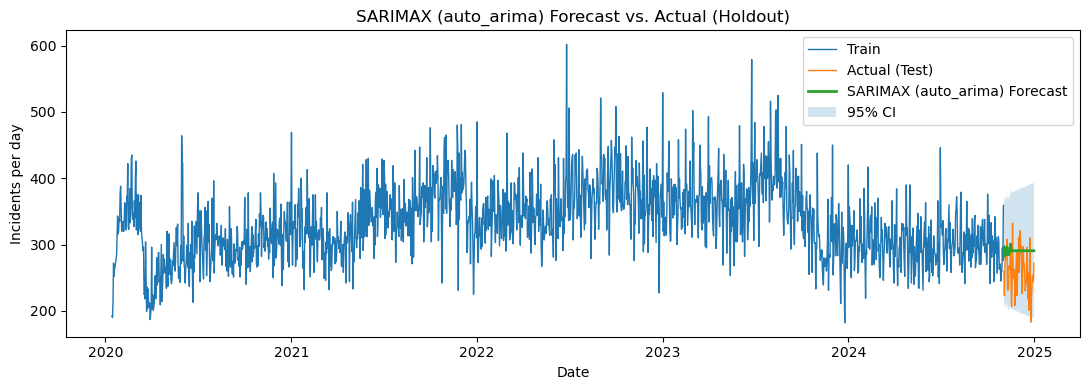

Saved: /Users/yenkopro/Desktop/bda600-capstone/reports/sarimax_autoarima_forecast.png
Baseline SARIMAX: {'MAE': 30.189, 'RMSE': 37.085, 'MAPE(%)': 12.58}
auto_arima SARIMAX: {'MAE': 37.315, 'RMSE': 44.557, 'MAPE(%)': 15.77}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [98]:
from pmdarima import auto_arima

auto = auto_arima(
    train_ts, seasonal=True, m=7, trace=False,
    stepwise=True, suppress_warnings=True, error_action="ignore"
)
print("auto_arima order:", auto.order, "seasonal_order:", auto.seasonal_order)

# Refit SARIMAX using auto_arima-suggested orders
(p,d,q) = auto.order
(P,D,Q,s) = auto.seasonal_order
sarimax2 = sm.tsa.statespace.SARIMAX(
    train_ts,
    order=(p,d,q),
    seasonal_order=(P,D,Q,s),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=False)

pred2 = sarimax2.get_forecast(steps=h)
pred2_mean = pred2.predicted_mean
pred2_ci = pred2.conf_int()

plt.figure(figsize=(11,4))
plt.plot(train_ts.index, train_ts, label="Train", linewidth=1)
plt.plot(test_ts.index, test_ts, label="Actual (Test)", linewidth=1)
plt.plot(test_ts.index, pred2_mean, label="SARIMAX (auto_arima) Forecast", linewidth=2)
plt.fill_between(test_ts.index, pred2_ci["lower y"], pred2_ci["upper y"], alpha=0.2, label="95% CI")
plt.title("SARIMAX (auto_arima) Forecast vs. Actual (Holdout)")
plt.xlabel("Date"); plt.ylabel("Incidents per day"); plt.legend()
plt.tight_layout()

out_path2 = reports_dir / "sarimax_autoarima_forecast.png"
plt.savefig(out_path2, dpi=150, bbox_inches="tight")
plt.show()
print("Saved:", out_path2)

# Compare errors
y_pred2 = pred2_mean.values
mae2 = mean_absolute_error(y_true, y_pred2)
rmse2 = mean_squared_error(y_true, y_pred2, squared=False)
mape2 = (np.abs((y_true - y_pred2) / np.maximum(y_true, 1e-6))).mean() * 100

print("Baseline SARIMAX:", {"MAE": round(mae,3), "RMSE": round(rmse,3), "MAPE(%)": round(mape,2)})
print("auto_arima SARIMAX:", {"MAE": round(mae2,3), "RMSE": round(rmse2,3), "MAPE(%)": round(mape2,2)})


In [ ]:
# 10.4 PROPHET vs SARIMAX COMPARISON

In [ ]:
# 10.4.1 Forecast Window

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

reports_dir = Path("/Users/yenkopro/Desktop/bda600-capstone/reports")

# Extract Prophet forecast subset that overlaps SARIMAX test range
prophet_subset = forecast.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]]
common_dates = prophet_subset.index.intersection(test_ts.index)

prophet_common = prophet_subset.loc[common_dates]
sarimax_common = pd.Series(pred_mean, index=test_ts.index).reindex(common_dates)
actual_common = test_ts.reindex(common_dates)

print("Common forecast range:", common_dates.min().date(), "→", common_dates.max().date())


Common forecast range: 2024-11-02 → 2024-12-31


In [ ]:
# 10.4.2 PLOT PROPHET VS SARIMAX VS ACTUAL

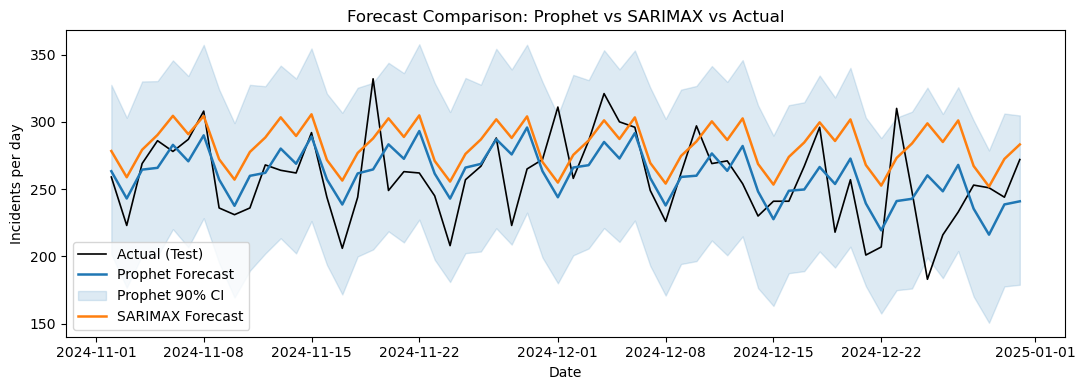

Saved: /Users/yenkopro/Desktop/bda600-capstone/reports/forecast_comparison.png


In [100]:
plt.figure(figsize=(11,4))
plt.plot(actual_common.index, actual_common, label="Actual (Test)", color="black", linewidth=1.2)
plt.plot(prophet_common.index, prophet_common["yhat"], label="Prophet Forecast", color="#1f77b4", linewidth=1.8)
plt.fill_between(prophet_common.index,
                 prophet_common["yhat_lower"],
                 prophet_common["yhat_upper"],
                 color="#1f77b4", alpha=0.15, label="Prophet 90% CI")
plt.plot(sarimax_common.index, sarimax_common, label="SARIMAX Forecast", color="#ff7f0e", linewidth=1.8)
plt.title("Forecast Comparison: Prophet vs SARIMAX vs Actual")
plt.xlabel("Date"); plt.ylabel("Incidents per day")
plt.legend()
plt.tight_layout()

out_path = reports_dir / "forecast_comparison.png"
plt.savefig(out_path, dpi=150, bbox_inches="tight")
plt.show()
print("Saved:", out_path)


In [ ]:
# 10.4.3 COMPARISON TABLE

In [101]:
# Compute error metrics on common range
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def get_metrics(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mape = (np.abs((y_true - y_pred) / np.maximum(y_true, 1e-6))).mean() * 100
    return {"Model": name, "MAE": round(mae,2), "RMSE": round(rmse,2), "MAPE(%)": round(mape,2)}

metrics = []
metrics.append(get_metrics(actual_common, prophet_common["yhat"], "Prophet"))
metrics.append(get_metrics(actual_common, sarimax_common, "SARIMAX"))

pd.DataFrame(metrics)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Model,MAE,RMSE,MAPE(%)
0,Prophet,21.56,27.83,8.58
1,SARIMAX,30.19,37.08,12.58


In [ ]:
# 11.1.1 District Crime Counts

In [102]:
import pandas as pd
from pathlib import Path

root = Path("/Users/yenkopro/Desktop/bda600-capstone")
processed_path = root / "data/processed/sfpd_daily_features.parquet"
reports_dir = root / "reports"

df = pd.read_parquet(processed_path)

# Aggregate by district and year
agg = (df.groupby(["Police District","year"])["count"]
         .sum()
         .reset_index()
         .rename(columns={"count":"total_incidents"}))

out_csv = root / "data/processed/district_counts_2020_2024.csv"
agg.to_csv(out_csv, index=False)
print("Saved:", out_csv)


Saved: /Users/yenkopro/Desktop/bda600-capstone/data/processed/district_counts_2020_2024.csv


In [ ]:
# 11.1.2 Predicted Hotspots

In [103]:
# Average 'high-incident' probability by district
hotspots = (df.groupby("Police District")["y_high"]
              .mean()
              .reset_index()
              .rename(columns={"y_high":"high_incident_rate"}))
hotspots.to_csv(root / "data/processed/predicted_hotspots.csv", index=False)
print("Saved predicted hotspots CSV")


Saved predicted hotspots CSV


In [104]:
forecast_out = forecast[["ds","yhat","yhat_lower","yhat_upper"]].copy()
forecast_out.to_csv(root / "data/processed/prophet_forecast_30days.csv", index=False)
print("Saved 30-day forecast CSV for dashboard charts")


Saved 30-day forecast CSV for dashboard charts


In [ ]:
# 12.1 MLflow summary

In [107]:
import mlflow
from mlflow.tracking import MlflowClient
from pathlib import Path

root = Path("/Users/yenkopro/Desktop/bda600-capstone")
summary_path = root / "reports/mlflow_summary.txt"

client = MlflowClient()

# Retrieve all experiments (compatible call)
experiments = client.search_experiments()

with open(summary_path, "w") as f:
    for exp in experiments:
        f.write(f"\n=== Experiment: {exp.name} ===\n")
        runs = client.search_runs([exp.experiment_id])
        for r in runs:
            f.write(f"\nRun: {r.info.run_name}\n")
            f.write(f"Status: {r.info.status}\n")
            f.write("Metrics:\n")
            for k, v in r.data.metrics.items():
                f.write(f"  - {k}: {v}\n")
            f.write("Params:\n")
            for k, v in r.data.params.items():
                f.write(f"  - {k}: {v}\n")
            f.write("-" * 40 + "\n")
print("Exported MLflow summary to:", summary_path)


Exported MLflow summary to: /Users/yenkopro/Desktop/bda600-capstone/reports/mlflow_summary.txt
